In [ ]:
Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Importing the data

In [2]:
data=pd.read_csv('signal-data.csv')

In [3]:
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [ ]:
Checking for null values:

In [8]:
data.isnull().any()

Time         False
0             True
1             True
2             True
3             True
             ...  
586           True
587           True
588           True
589           True
Pass/Fail    False
Length: 592, dtype: bool

In [ ]:
It is seen that null values are present in several columns and have to be treated.

In [ ]:
The'Time' column is not required and will thus be removed for futher processing:

In [4]:
data1=data.drop(columns='Time')

In [10]:
data1.shape

(1567, 591)

In [ ]:
Imputing the missing data using KNNImputer:

In [5]:
imputer = KNNImputer()
imputer.fit(data1)
data2 = imputer.transform(data1)

In [6]:
data3=pd.DataFrame(data2,columns=data1.columns)

In [7]:
data4=pd.concat([data['Time'],data3],axis=1)

In [9]:
data4

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.50050,...,76.26292,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742,-1.0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.49660,...,208.20450,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045,-1.0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.44360,...,82.86020,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602,1.0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.48820,...,73.84320,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432,-1.0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.50310,...,144.17846,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.34240,...,203.17200,0.4988,0.0143,0.0039,2.8669,0.00680,0.01380,0.00470,203.1720,-1.0
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.43330,...,126.43176,0.4975,0.0131,0.0036,2.6238,0.00680,0.01380,0.00470,203.1720,-1.0
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.47424,...,43.52310,0.4987,0.0153,0.0041,3.0590,0.01970,0.00860,0.00250,43.5231,-1.0
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.46220,...,93.49410,0.5004,0.0178,0.0038,3.5662,0.02620,0.02450,0.00750,93.4941,-1.0


In [120]:
data4.dtypes=='int'

Time         False
0            False
1            False
2            False
3            False
             ...  
586          False
587          False
588          False
589          False
Pass/Fail    False
Length: 592, dtype: bool

In [119]:
data4.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0000

In [ ]:
It is seen that many columns contain the same value and thus have a standard deviation of 0.

In [30]:
cols=data4.describe().columns.to_list()

In [ ]:
Checking for columns with high skew and moderate skew:

In [43]:
highskew=[]
for col in cols:
    if abs(data4[col].skew()>1):
        highskew.append(data4[col].skew())

In [44]:
len(highskew)

294

In [45]:
moderateskew=[]
for col in cols:
    if abs(data4[col].skew()>0.5) & abs(data4[col].skew()<=1):
        moderateskew.append(data4[col].skew())

In [46]:
len(moderateskew)

43

In [ ]:
There are 294 attributed which are highly skewed while there are 43 attributes which are moderately skewed, the rest of which are fairly unifomly distributed.

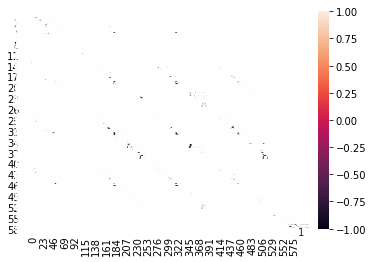

In [47]:
sns.heatmap(data4.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
The heatmap cannote be visualized properly due to the presence of large number of columns.

In [143]:
data4.corr().unstack().sort_values().drop_duplicates()

36   34    -1.000000
93   106   -0.991200
104  99    -0.989930
105  92    -0.988888
96   94    -0.957005
              ...   
74   478    1.000000
209  478    1.000000
     206    1.000000
347  209    1.000000
0    5           NaN
Length: 112507, dtype: float64

In [ ]:
It is seen that many values are highly correlated and thus the multicollinearity needs to be treated.

In [ ]:
Finding the distribution of the target variable:

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


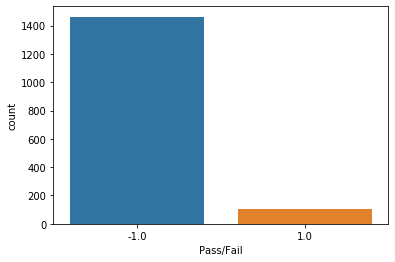

In [48]:
sns.countplot(data4['Pass/Fail'])

In [ ]:
From the above countplot as well as the printed values below it can be seen that there is a high imbalance in the count of the target value 1 and -1. Thus the data needs to undergo sampling in order to treat this imbalance.

In [57]:
print(data4[data4['Pass/Fail']==-1]['Pass/Fail'].count())
print(data4[data4['Pass/Fail']==1]['Pass/Fail'].count())

1463
104


In [207]:
data4.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,114.84914,506.68048,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,0.10710,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,0.98248,100.82232,233.49206,0.46334,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,0.09320,1257.28018,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,0.00802,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,0.00134,1.59240,4.29598,0.05116,0.0188,0.0

In [ ]:
Dropping the 'Time' and 'Pass/Fail' columns in order to standardize the data:

In [121]:
imbalanced_input=data4.drop(columns=['Time','Pass/Fail'])

In [122]:
imbalanced_output=data4['Pass/Fail']

In [123]:
x_input=imbalanced_input.apply(zscore)

C:\Program Files\Python37\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [ ]:
The columns containing the same value in all the rows become undefined due to 0 standard deviation and hence the nan values in these columns are replaced with 0.

In [124]:
x_input1=x_input.replace(np.nan,0)

In [ ]:
Training the model without treating the imbalance:

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x_input1,imbalanced_output,test_size=0.2,random_state=42)

In [213]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [214]:
y_pred=model.predict(x_test)

In [215]:
confusion_matrix(y_test,y_pred)

array([[290,   0],
       [ 24,   0]], dtype=int64)

In [ ]:
From the confusion matrix,it can be seen that none of the 1 values get predicted.

In [ ]:
Applying stratified kfold in order to ensure the training and validation data maintain the ratio of the positives to negatives in the same manner:

In [16]:
from sklearn.model_selection import StratifiedKFold 

In [126]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [127]:
model=RandomForestClassifier()
score = cross_val_score(model ,x_input1 ,imbalanced_output, cv = skf,scoring='f1_micro')

In [128]:
score

array([0.93630573, 0.93630573, 0.93630573, 0.92993631, 0.92993631,
       0.92993631, 0.92993631, 0.93589744, 0.93589744, 0.93589744])

In [129]:
print(score.mean())
print(score.std())

0.9336354728074474
0.0030244939986264576


In [ ]:
A mean f1 score of around 93% is obtained and a deviation of 3% between all the scores which is not bad.

In [ ]:
Resampling the data to treat imbalance:
    i) Minority upsampling
    ii)Majoriy Downsampling
    iii)Sampling using SMOTE Technique

In [17]:
from sklearn.utils import resample

In [ ]:
i) Upsampling of minority data:
    Since the count of minority data is very less, replace=True in order to match the count of the majority class.
    The number of samples generated is equal to the difference between the count of majority and minority classes.

In [130]:
data4_minority = data4[data4['Pass/Fail']==1]

In [131]:
from sklearn.utils import resample
data4_minority_upsampled = resample(data4_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=(1463-104),    # to match majority class
                                 random_state=123)

In [ ]:
Displaying the upsampled data:

In [15]:
data4_minority_upsampled 

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
709,2008-03-09 01:15:00,3026.32,2485.81,2205.7222,906.9522,1.3443,100.0,105.6600,0.1200,1.4943,...,64.71590,0.5025,0.0131,0.0030,2.6053,0.0161,0.0350,0.0105,217.1506,1.0
1327,2008-05-10 16:37:00,3188.42,2565.93,2208.9000,934.7558,1.9469,100.0,119.3544,0.1222,1.4984,...,173.00166,0.5042,0.0099,0.0027,1.9599,0.0230,0.0210,0.0053,91.4264,1.0
1364,2008-06-10 13:55:00,3163.86,2470.60,2211.4000,1511.7842,1.3004,100.0,97.4700,0.1237,1.4362,...,103.37372,0.5028,0.0113,0.0027,2.2491,0.0182,0.0077,0.0025,42.5048,1.0
1443,2008-09-10 15:55:00,3173.18,2428.64,2209.4667,1556.3930,1.4884,100.0,95.1156,0.1206,1.6073,...,88.15280,0.5021,0.0192,0.0041,3.8289,0.0281,0.0247,0.0075,88.1528,1.0
115,2008-05-08 07:12:00,3002.85,2502.05,2232.5889,1717.2750,1.6700,100.0,104.1067,0.1223,1.4518,...,45.68350,0.4995,0.0093,0.0026,1.8612,0.0364,0.0166,0.0042,45.6835,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,2008-06-10 13:38:00,3016.46,2559.42,2167.0889,1253.2140,1.3679,100.0,101.6667,0.1243,1.4093,...,46.25990,0.4995,0.0122,0.0035,2.4500,0.0182,0.0077,0.0025,42.5048,1.0
327,2008-08-20 09:17:00,2954.36,2559.27,2238.5444,1659.1424,0.9010,100.0,99.3100,0.1204,1.4086,...,46.92530,0.4972,0.0260,0.0056,5.2369,0.0226,0.0106,0.0034,46.9253,1.0
583,2008-08-30 14:10:00,2949.82,2497.56,2173.4556,1433.6732,1.0304,100.0,110.5422,0.1245,1.4031,...,83.37136,0.4961,0.0185,0.0044,3.7335,0.0332,0.0216,0.0083,65.1043,1.0
1443,2008-09-10 15:55:00,3173.18,2428.64,2209.4667,1556.3930,1.4884,100.0,95.1156,0.1206,1.6073,...,88.15280,0.5021,0.0192,0.0041,3.8289,0.0281,0.0247,0.0075,88.1528,1.0


In [ ]:
Concatenating the upsampled minority data with the original data:

In [132]:
data_balanced=pd.concat([data4,data4_minority_upsampled],ignore_index=True)

In [65]:
data_balanced

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,76.26292,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742,-1.0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.20450,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045,-1.0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.86020,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602,1.0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.84320,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432,-1.0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,144.17846,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2008-06-10 13:38:00,3016.46,2559.42,2167.0889,1253.2140,1.3679,100.0,101.6667,0.1243,1.4093,...,46.25990,0.4995,0.0122,0.0035,2.4500,0.01820,0.00770,0.00250,42.5048,1.0
2922,2008-08-20 09:17:00,2954.36,2559.27,2238.5444,1659.1424,0.9010,100.0,99.3100,0.1204,1.4086,...,46.92530,0.4972,0.0260,0.0056,5.2369,0.02260,0.01060,0.00340,46.9253,1.0
2923,2008-08-30 14:10:00,2949.82,2497.56,2173.4556,1433.6732,1.0304,100.0,110.5422,0.1245,1.4031,...,83.37136,0.4961,0.0185,0.0044,3.7335,0.03320,0.02160,0.00830,65.1043,1.0
2924,2008-09-10 15:55:00,3173.18,2428.64,2209.4667,1556.3930,1.4884,100.0,95.1156,0.1206,1.6073,...,88.15280,0.5021,0.0192,0.0041,3.8289,0.02810,0.02470,0.00750,88.1528,1.0


In [ ]:
Standardizing the data with the upsampled values:

In [133]:
input_data=data_balanced.drop(columns=['Time','Pass/Fail'])
data_balanced1=input_data.apply(zscore)

C:\Program Files\Python37\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [72]:
input_data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.00516,76.26292,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.00600,208.20450,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.01480,82.86020,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.00440,73.84320,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.00550,144.17846,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432


In [95]:
pd.set_option('display.max_columns', None)

In [ ]:
Replacing Nan values with 0:

In [134]:
data_balanced2=data_balanced1.replace(np.nan, 0)


In [135]:
data_balanced2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,0.232696,0.893859,-0.435819,0.084070,-0.036116,0.0,-0.642371,0.303998,0.522381,1.237901,-0.433598,-1.609624,0.857213,0.0,-0.263044,0.138627,0.069695,-0.322907,0.902824,0.162838,-0.183278,0.108678,0.671776,-0.188029,0.419381,-1.373262,-0.511239,-2.409199,-1.342225,-0.887465,-0.697888,-0.220397,-0.879054,0.221021,0.042440,-0.097778,-0.042449,0.238588,0.126119,-0.691952,-0.155313,0.604836,0.0,-0.441403,0.966749,-0.819368,-0.871426,0.667646,0.314089,0.0,-0.946479,0.975126,0.0,-0.037204,0.019141,-0.785812,0.350308,-0.163316,1.281543,-0.692151,-0.702946,0.646196,-0.824568,0.198948,0.084806,0.215988,-1.039717,-0.074485,0.286088,0.0,-1.050152,-0.583794,-2.476168,3.313619,-0.01849,0.630228,0.368044,0.626310,-0.286373,-0.600369,0.327321,-2.007860,-0.269258,-0.391059,-0.218479,-3.142399,-0.376328,-0.666541,-1.154828,-0.091948,-0.344381,-4.094666,-1.955586,0.098302,0.808869,2.126512,-1.462344,0.0,1.145031,-0.353441,0.437103,1.143938,2.009802,1.396264,0.310396,2.035199,-0.135905,-2.581374,3.791858,0.550405,-0.405999,1.316529,0.134369,0.045943,-0.128282,0.101014,0.423966,-0.001364,0.285762,1.151585,0.590601,0.696553,-1.368677,0.900277,1.007136,-1.081921,2.248647,-1.799931,-0.081328,0.272528,-0.434784,-0.896974,-0.393131,-0.652900,-0.000973,0.141955,-0.534531,-1.013448,-0.972801,-0.244308,-0.036809,0.0,0.078607,-0.574412,-0.431632,1.028819,-0.892112,0.723952,0.286711,0.0,-0.773890,-0.109076,-0.030828,0.537294,0.972125,-0.054311,-0.125550,2.187757,1.356053,0.003202,0.476968,-0.740174,-0.707652,-0.437840,-0.340787,-0.377178,-0.557777,-0.505961,-1.122030,-1.796547,0.200176,-0.112104,-0.097346,0.139472,-0.095917,1.449262,2.068738,-0.827511,0.0,0.0,0.767247,-0.939679,0.513917,-1.605072,-0.704562,-0.288820,0.0,-0.979745,0.933665,0.0,0.0,0

In [ ]:
Defining the output:

In [136]:
output=data_balanced['Pass/Fail']

In [84]:
output

0      -1.0
1      -1.0
2       1.0
3      -1.0
4      -1.0
       ... 
2921    1.0
2922    1.0
2923    1.0
2924    1.0
2925    1.0
Name: Pass/Fail, Length: 2926, dtype: float64

In [ ]:
Training the model with all the columns and the upsampled data:

In [137]:
x_train,x_test,y_train,y_test=train_test_split(data_balanced2,output,test_size=0.2,random_state=42)

In [94]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
2826,1.072340,-0.740134,-0.100657,-0.816009,-0.037173,0,0.303564,-0.223962,0.600096,-1.374568,...,0.039361,-0.266868,0.032363,-0.242937,-0.379481,-0.236057,1.184997,-0.108546,0.145448,-0.622223
2591,2.001645,-0.887244,0.296666,0.453065,-0.032995,0,-1.084172,-0.183350,2.118530,-1.827396,...,0.923068,-0.050963,0.505777,0.268635,0.070568,0.255218,0.546599,0.856280,0.713305,-0.138166
2227,0.408285,-0.696975,-1.031243,-0.034327,-0.031624,0,-0.791537,0.141549,-0.924316,0.199880,...,-0.090870,0.012943,0.533625,0.098111,0.209045,0.087786,0.496854,0.493051,0.748796,-0.251385
2513,0.594195,0.991362,-0.033999,-0.603613,-0.036684,0,0.327550,0.100937,-0.531256,1.008004,...,-1.355966,-0.971853,0.282994,-0.450531,-0.587197,-0.438236,-0.182998,-1.130125,-1.025757,-0.708361
542,-0.614659,0.850305,-1.517691,-0.782321,-0.049698,0,0.033322,0.290461,1.099267,0.708441,...,-1.030390,-1.304705,1.480454,0.209322,0.035949,0.186012,1.956048,-0.959862,-0.777320,-0.914455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.177800,0.173312,0.030782,-1.019987,-0.050538,0,-0.220983,-0.237499,0.413281,0.025715,...,-0.360633,0.019719,-2.446101,-0.294836,-0.344862,-0.268764,0.629508,0.742771,0.571341,-0.214983
1095,1.144715,-0.623552,-1.035361,-0.718036,-0.036547,0,0.489875,-0.156275,-0.969151,-0.817241,...,-0.230402,-0.605602,-0.942314,-0.228109,-0.275624,-0.213764,-0.241034,-0.290160,-0.138481,-0.252030
1130,-0.210879,-0.642763,-0.524569,-0.449552,-0.050193,0,0.814367,-0.156275,-1.565465,1.850960,...,-0.118776,-0.490264,1.257671,-0.176210,-0.275624,-0.181165,0.471981,-0.006388,-0.032007,-0.424656
1294,0.105480,0.883201,-1.226718,-1.694271,-0.037865,0,4.954016,0.439373,-1.620763,-1.040172,...,-1.542010,-1.155965,-1.944839,-0.205867,-0.414101,-0.183384,0.198383,-1.198231,-1.167721,-0.822359


In [89]:
y_train

2826    1.0
2591    1.0
2227    1.0
2513    1.0
542    -1.0
       ... 
1638    1.0
1095   -1.0
1130   -1.0
1294   -1.0
860    -1.0
Name: Pass/Fail, Length: 2340, dtype: float64

In [ ]:
Training the Random Forest Classifier on the training data:

In [138]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
Testing the trained model on the test data and generating the confusion matrix and classification report respectively:

In [139]:
y_pred=model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [140]:
conf=confusion_matrix(y_test,y_pred)

In [141]:
conf

array([[306,   0],
       [  0, 280]], dtype=int64)

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       306
         1.0       1.00      1.00      1.00       280

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



In [ ]:
From the above matrix and report, it is seen that the model has been trained perfectly with no false positives or negatives. This could mean that the training may have been overfit and the data has been leaked into the training set as well due to sampling with replacement:

In [ ]:
In order to treat multicollinearity and reduce the dimensions, Principal Component Analysis has been carried out:

In [ ]:
Generating the plot containing the cumulative variance of all the components:

Text(0, 0.5, 'cumulative explained variance')

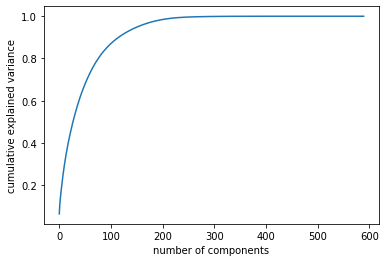

In [21]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_balanced2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
From the plot above, it can be seen that nearly 100% of the variance is cumulatively obtained with 200 components itself. Thus the data is transformed using PCA with 200 components.

In [116]:
pca = PCA(n_components=200)
pca.fit(data_balanced2)
x_pca = pca.transform(data_balanced2)

In [194]:
x_pca_input=pd.DataFrame(x_pca)

In [119]:
x_pca_input.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.397482,1.642294,4.126102,0.836334,-3.304816,1.130729,-2.584743,-4.760066,1.651491,5.841285,2.394893,-1.137637,-3.671529,0.429871,-2.232474,-1.945475,-2.009671,-2.715546,0.223916,2.645419,-1.035682,4.153536,0.995865,-3.027514,1.968319,0.256911,-1.406902,-0.864644,-0.154527,0.522355,1.466429,-0.294392,0.815227,-0.226558,-1.341712,0.576646,2.129929,-1.508221,-4.326841,-0.164107,1.897447,-2.663397,-0.302317,-0.951279,-2.529744,-2.261443,-0.495928,-0.766289,0.666514,-2.494107,0.365475,-0.857080,1.305371,1.182892,4.041647,0.905668,0.913978,-0.810866,-1.293253,0.341553,-1.289008,-1.951794,-2.532349,-0.132914,-2.281796,0.991712,-1.430512,-1.933324,2.057781,-2.459746,0.523952,-0.876464,0.087841,0.365555,0.587052,-1.011380,-1.410886,-0.363327,1.077244,-0.314613,-1.379909,-0.311527,0.980093,1.029594,-1.814836,0.379961,-1.755716,1.117065,0.203154,-0.309700,-0.969117,0.161761,-2.339165,1.354654,-0.326134,-0.513980,4.047535,2.180934,0.220542,2.056281,0.765066,0.248629,0.774783,2.328825,-0.943154,-2.824770,-0.253356,-1.147785,1.013754,1.271867,1.757551,1.867824,-0.983589,-1.003551,1.499807,-0.272003,-1.261397,1.312659,-0.956550,-1.584565,-0.546236,-0.619712,-1.656998,-0.700097,0.085201,0.287359,0.426650,1.876508,-0.439452,0.821570,0.467855,0.512853,-0.352130,0.175574,1.283512,0.498547,1.337056,0.389592,-0.232811,-0.990448,-0.230299,-0.447561,0.207687,0.248047,1.029362,-0.143202,0.968718,-1.737465,-1.323380,-1.235879,-1.053555,0.985912,1.283411,0.500796,-0.272850,-0.288445,-0.344634,0.851864,-0.125946,0.347030,0.378823,-0.914853,0.618717,0.311654,2.303074,-1.282533,-0.323441,0.238660,-1.035988,-0.804980,-1.445907,1.254386,0.092319,-1.336978,-0.250564,0.069906,0.277711,0.041261,0.888451,0.069981,0.016490,-0.117487,-0.026073,0.491943,-1.592219,0.693120,0.928873,-0.654387,-0.218659,1.381075,0.033433,-0.380298,0.418805,0.151562,1.344275,0.788486,-0.036989,-0.104570,-0.594820,0.344152
1,-2.730767,-0.109367,3.466407,-0.366812,-0.610065,0.975939,-1.054012,-0.523193,-1.989419,4.638258,0.175853,-1.479549,-0.338307,0.218263,-0.121953,2.097035,-1.089262,-1.582394,3.129411,-1.501297,-1.898619,2.379498,-2.565146,0.234527,1.370787,0.027087,-0.994656,2.498026,-1.415014,-0.615728,2.667361,-1.764530,0.133939,-0.116183,-1.154943,1.309568,0.000328,-0.988719,0.696728,-1.150233,0.307694,0.670711,0.651321,0.721418,-2.925578,-1.653258,-1.675377,-5.023188,0.099764,1.034672,0.662610,2.075152,-1.108709,0.542369,0.910718,-0.284929,-1.628014,-1.017290,0.740152,3.129275,1.471892,1.468780,-2.244691,-0.312273,0.521607,1.106571,-1.782388,-1.351289,1.895724,0.956731,0.490790,0.470990,-3.212623,0.567528,-2.704232,0.738982,0.604079,-0.670167,0.722410,-1.299193,-0.163577,-2.858841,-2.436759,1.620962,-2.622748,-1.343012,0.697858,-2.226847,-1.537295,0.113102,0.427525,-1.534989,-2.100359,0.064174,-1.698051,0.884860,0.019988,0.045434,1.780845,-0.441823,1.247081,0.061893,-0.617548,0.085922,-1.419908,-0.504955,-0.759624,-1.243082,-0.886503,-0.864294,1.388083,0.931538,0.901724,0.393999,-0.445805,0.826655,1.301532,-1.474048,-0.025839,-0.295266,-0.559165,-0.499138,-1.936675,3.045578,0.423999,-0.640180,-1.171019,-2.278015,-0.488950,0.026219,0.133015,-1.830219,0.189839,-0.915717,0.554600,0.592504,0.625233,1.291978,-1.821764,0.952375,-0.788777,-0.373675,-0.788543,-0.070424,1.561772,1.284588,0.930127,-1.1516

In [190]:
x_pca_input['Pass/Fail']=output

In [ ]:
Carrying out Cross Validation using the PCA transformed input data:

In [15]:
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut 

In [ ]:
Defining the different cross validation techniques:

In [193]:
kf = RepeatedKFold(n_splits=5,n_repeats=10) 

In [201]:
kf_normal=KFold(n_splits=5) 

In [205]:
kf_loocv=LeaveOneOut()

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_input,output,test_size=0.2,random_state=42)

In [197]:
model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
from sklearn.model_selection import cross_val_score

In [ ]:
Using repeated Kfold cross validation with 10 repeats and 5 splits:

In [198]:

result = cross_val_score(model1 ,x_pca_input ,output, cv = kf)

In [199]:
result

array([1.        , 0.9982906 , 1.        , 1.        , 0.9965812 ,
       0.99829352, 1.        , 0.9965812 , 1.        , 1.        ,
       1.        , 0.9982906 , 0.9982906 , 0.9982906 , 1.        ,
       1.        , 1.        , 0.9982906 , 0.9965812 , 1.        ,
       0.99829352, 1.        , 0.9965812 , 1.        , 1.        ,
       1.        , 0.9982906 , 1.        , 0.9965812 , 1.        ,
       0.99829352, 0.9982906 , 0.9982906 , 1.        , 1.        ,
       0.99829352, 1.        , 0.9982906 , 1.        , 0.9982906 ,
       0.99829352, 1.        , 1.        , 0.9965812 , 1.        ,
       1.        , 1.        , 0.9982906 , 1.        , 0.9965812 ])

In [ ]:
Using Kfold cross validation with 5 splits:

In [202]:
result1 = cross_val_score(model1 ,x_pca_input ,output, cv = kf_normal)

In [203]:
result1

array([1.        , 1.        , 0.99487179, 1.        , 1.        ])

In [ ]:
Using Leave One Out Cross Validation Technique:
    

In [225]:
result2 = cross_val_score(model1 ,x_pca_input ,output, cv = kf_loocv)

In [226]:
result2.mean()

0.9989747095010253

In [ ]:
The results seem to be good in all the 3 techniques. However, the LOOCV technique is highly time consuming with such large amount of data and thus will not be used for validationg the models below:

In [123]:
y_pred=model1.predict(x_test)

In [124]:
conf=confusion_matrix(y_test,y_pred)

In [125]:
conf

array([[306,   0],
       [  0, 280]], dtype=int64)

In [ ]:
From the confusion matrix above, it is seen that there are no false positives or negatives.

In [ ]:
ii) Downsampling the majority data:
    Here the samples are not drawn with replacement since they are present higher in number.

In [ ]:
Defining the majority data for resampling:

In [126]:
data4_majority = data4[data4['Pass/Fail']==-1]

In [127]:
len(data4_majority)

1463

In [ ]:
Carrying out the downsampling:

In [128]:
data4_majority_downsampled = resample(data4_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=(104),    # to match majority class
                                 random_state=123)

In [ ]:
Displaying the downsampled data:

In [129]:
data4_majority_downsampled

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
53,2008-07-29 23:19:00,3058.98,2484.31,2172.9778,1222.6067,1.3658,100.0,101.8400,0.1220,1.5321,-0.0008,0.0047,0.9527,200.0029,0.0,13.4387,422.3048,10.6441,0.9768,189.3587,12.4278,1.4160,-5545.00,2624.00,-3817.0000,-3835.2500,1.3265,1.9772,7.3942,64.0778,2.5000,0.2111,3.4639,85.6591,8.8249,50.3878,64.1536,49.6122,65.8859,86.8889,118.3554,65.836,3.0804,70.0,361.0118,10.0235,125.9000,724.3436,1.3559,145.9264,1.0,632.8382,208.6676,0.0,4.641,4.880,2864.0,0.9326,0.9509,4.6879,0.6782,357.2118,10.7035,106.5782,16.6618,19.3218,27.7301,696.6135,0.9699,152.3864,1.0,616.1764,106.4195,148.20140,467.97500,0.0,-0.0266,0.0262,-0.0313,-0.0298,-0.0085,0.0200,-0.0184,0.0143,7.0135,0.1372,0.11400,2.3986,0.9861,1874.2109,0.1499,9020.2799,-0.01260,-0.0020,0.0020,-0.00010,0.00010,0.04440,0.0,0.01640,0.07720,-0.00020,0.00000,0.02970,-0.0078,-0.0010,0.0020,-0.00190,0.01900,-0.00680,0.97968,100.96740,232.03308,0.46622,0.9429,0.0000,804.6780,0.9909,58.6847,0.5930,0.9677,6.2458,15.87,3.628,15.92,15.90,1.0210,2.564,0.5835,3.016,0.0946,0.7484,0.9966,2.3179,1007.6964,41.5317,96.0,109.1,57.4,54.2000,416.5400,0.1710,0.0,7.71,0.0038,0.0655,0.0396,0.0458,0.0242,8.3652,0.0,15.146,6.272,0.4566,0.0117,7.9085,0.390,0.0500,0.05928,1192.37978,444.0,264.0,712.0,31669.0,0.125,0.057,0.101,2.3,0.7,0.133,0.363,0.5398,0.0739,0.2794,0.5831,0.2794,0.9636,0.3091,0.254,0.0,0.0,12.51,0.687,6.19,22.695,0.1069,5.80,0.0,15.53,64.296,0.0,0.0,0.0,0.0,0.0,0.0,0.238,5.62,16.86,0.324,8.21,8.34,5.62,5.511,21.620,0.1479,7.24,0.0,8.34,76.345,0.0,0.0569,0.0414,0.0312,0.0785,0.0613,0.1152,0.0901,0.0687,3.7162,0.0025,0.00846,0.1290,0.0039,120.4108,0.0157,776.3994,0.0,0.0156,0.0092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0039,0.0045,0.0,0.0,0.0,0.0,0.00226,1.37544,3.22372,

In [130]:
data4[data4['Pass/Fail']==1]

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.0000,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.370,5.434,70.0,364.3782,9.8783,131.8027,734.7924,1.2992,141.0845,1.0,637.2655,185.7574,0.0,4.486,4.748,2936.0,0.9139,0.9447,4.5873,23.8245,364.5364,10.1685,115.6273,11.3019,16.1755,24.2829,710.5095,0.8694,145.8000,1.0,625.9636,84.7681,140.69720,485.26650,0.0,-0.0078,-0.0326,-0.0052,0.0213,-0.0054,-0.1134,-0.0182,0.0287,7.1041,0.1362,0.11328,2.4532,0.9880,1685.8514,0.14970,9317.16980,0.0553,0.0006,-0.0013,0.0000,0.0002,-0.1343,0.0,-0.1427,0.1218,0.0006,-0.0001,0.0134,-0.0026,-0.0016,-0.0006,0.0013,-0.0301,-0.0728,0.97936,100.57830,231.72132,0.46840,0.9231,0.0,718.5777,0.9899,58.4808,0.6015,0.9772,6.4527,15.90,2.882,15.94,15.95,0.8798,3.094,0.4777,3.272,-0.1892,0.8194,0.9978,2.2592,998.4440,42.0579,89.0,126.4,96.5,45.1001,306.0380,0.3263,0.0,8.33,0.0038,0.0754,0.0483,0.0619,0.0221,8.2660,0.0,4.819,8.443,0.4909,0.0177,8.2054,0.47,0.0497,0.05764,952.48018,562.0,788.0,759.0,2100.0,0.187,0.117,0.068,2.1,1.4,0.123,0.319,1.0824,0.0369,0.3141,0.5753,0.3141,0.9677,0.2706,0.326,0.0,0.0,17.78,0.745,13.31,22.912,0.1959,9.21,0.0,17.87,60.110,0.0,0.0,0.0,0.0,0.0,0.0,0.139,5.09,19.75,0.949,9.71,16.73,5.09,11.059,22.624,0.1164,13.30,0.0,16.73,79.618,0.0,0.0339,0.0494,0.0696,0.0406,0.0401,0.0840,0.0349,0.0718,2.4266,0.0014,0.01042,0.0963,0.0152,182.4956,0.02840,839.60060,0.0,0.0192,0.0170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0062,0.0040,0.0,0.0,0.0,0.0,0.00146,1.25534,4.01898,0.17290,0.0273,0.

In [ ]:
Concatenating the original minority data and the downsampled majority data:

In [131]:
data_balanced3=pd.concat([data4[data4['Pass/Fail']==1],data4_majority_downsampled],ignore_index=True)

In [132]:
data_balanced3

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.0000,-1916.5000,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.370,5.4340,70.0,364.3782,9.8783,131.8027,734.7924,1.2992,141.0845,1.0,637.2655,185.7574,0.0,4.486,4.748,2936.0,0.9139,0.9447,4.5873,23.8245,364.5364,10.1685,115.6273,11.3019,16.1755,24.2829,710.5095,0.8694,145.8000,1.0,625.9636,84.7681,140.69720,485.26650,0.0,-0.0078,-0.0326,-0.0052,0.0213,-0.0054,-0.1134,-0.0182,0.0287,7.1041,0.1362,0.11328,2.4532,0.9880,1685.8514,0.1497,9317.1698,0.05530,0.0006,-0.0013,0.00000,0.00020,-0.13430,0.0,-0.14270,0.12180,0.00060,-0.00010,0.01340,-0.0026,-0.0016,-0.0006,0.00130,-0.03010,-0.07280,0.97936,100.57830,231.72132,0.46840,0.9231,0.0000,718.5777,0.9899,58.4808,0.6015,0.9772,6.4527,15.90,2.882,15.94,15.95,0.8798,3.094,0.4777,3.272,-0.1892,0.8194,0.9978,2.2592,998.4440,42.0579,89.0,126.4,96.5,45.1001,306.0380,0.3263,0.0,8.33,0.0038,0.0754,0.0483,0.0619,0.0221,8.2660,0.0,4.819,8.443,0.4909,0.0177,8.2054,0.470,0.0497,0.05764,952.48018,562.0,788.0,759.0,2100.0,0.187,0.117,0.068,2.1,1.4,0.123,0.319,1.0824,0.0369,0.3141,0.5753,0.3141,0.9677,0.2706,0.326,0.0,0.0,17.78,0.745,13.31,22.912,0.1959,9.21,0.0,17.87,60.110,0.0,0.0,0.0,0.0,0.0,0.0,0.139,5.09,19.75,0.949,9.71,16.73,5.09,11.059,22.624,0.1164,13.30,0.0,16.73,79.618,0.0,0.0339,0.0494,0.0696,0.0406,0.0401,0.0840,0.0349,0.0718,2.4266,0.0014,0.01042,0.0963,0.0152,182.4956,0.0284,839.6006,0.0,0.0192,0.0170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0062,0.0040,0.0,0.0,0.0,0.0,0.00146,1.25534,4.01898,0.

In [ ]:
Defining the input followed by its standardization:

In [133]:
input_data1=data_balanced3.drop(columns=['Time','Pass/Fail'])
data_balanced4=input_data1.apply(zscore)

C:\Program Files\Python37\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [ ]:
Replacing the nans with 0

In [134]:
data_balanced5=data_balanced4.replace(np.nan, 0)


In [135]:
data_balanced5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,-0.970678,0.883591,-0.561180,0.903143,-0.097077,0.0,-1.038598,0.246134,-0.427504,0.317386,0.080024,-0.155206,0.783199,0.0,0.384632,0.515586,-1.079383,-0.578400,0.999432,0.254082,0.399210,0.065952,0.085258,-0.157496,-0.676741,0.588833,0.447101,0.706042,-0.487076,-0.128684,-0.381260,-0.099216,-0.301572,-0.252867,-0.400513,-0.145861,0.400503,-1.432171,-3.735303,0.050341,-2.371640,0.781882,0.0,1.393945,-0.779071,-0.672954,0.044861,0.577297,0.296685,0.0,0.548823,0.386858,0.0,-3.121074,-2.208142,2.801033,-2.879842,-0.970532,-0.231487,1.974631,1.518421,-0.766838,-0.108635,-0.516501,-0.788891,-0.439848,0.313272,-0.069811,-0.201072,0.0,0.737438,-0.571709,-0.677988,1.892599,0.0,-0.079692,0.004419,0.040376,0.679053,-0.539461,-1.718820,0.179922,0.637428,-0.631044,0.637102,0.573787,1.344843,0.366823,-2.427366,-0.453165,1.412573,0.637908,-0.047167,-0.348181,0.206631,1.309248,-0.692259,0.0,-0.233987,1.276278,1.572820,-0.389512,0.217987,1.931864,-1.244188,0.050420,0.350997,-0.338329,-0.778201,-0.496113,-0.755128,0.165671,0.340457,-1.672510,-0.137359,-0.451783,0.370589,-0.058820,0.480323,0.590729,1.332658,0.909824,-1.005693,0.940228,1.164970,-0.896156,1.288519,-1.183067,0.352333,0.151612,0.811853,-0.077600,-1.010333,-1.021310,1.043185,-0.431599,-0.238951,-0.606876,-1.089046,-0.383699,-0.098525,0.0,0.151997,-0.241278,-0.639036,-0.610205,0.352802,0.526762,0.138930,0.0,-0.567721,-0.470445,-0.290501,0.844797,0.268563,-0.055759,-0.213776,0.389346,-0.175986,-0.344396,0.151729,-0.836213,-0.383633,0.128683,-0.154776,-0.419284,-0.518515,0.202840,-0.014781,-0.359515,2.341365,-1.302159,-0.222225,-0.081938,-0.222249,1.432117,0.319143,-0.257886,0.0,0.0,-0.200399,0.985942,0.685877,-0.713067,0.255148,0.755772,0.0,-0.057223,0.547410,0.0,0.0,0.0,0.0,0

In [136]:
output=data_balanced3['Pass/Fail']

In [137]:
x_train,x_test,y_train,y_test=train_test_split(data_balanced5,output,test_size=0.2,random_state=42)

In [138]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [139]:
y_pred=model2.predict(x_test)

In [140]:
conf=confusion_matrix(y_test,y_pred)

In [141]:
conf

array([[14,  9],
       [ 6, 13]], dtype=int64)

In [ ]:
It is seen that many false positives and negatives are predicted due to lack of data for training:

In [ ]:
iii)Generating minority samples using SMOTE:

In [ ]:
Since SMOTE is a knn based technique, the data is first standardized before carrying out the sampling:

In [8]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [9]:
data4_input=data4.drop(columns=['Time','Pass/Fail'])
data4_input1=data4_input.apply(zscore)

C:\Program Files\Python37\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [10]:
data4_input2=data4_input1.replace(np.nan, 0)

In [11]:
data4_output=data4['Pass/Fail']

In [ ]:
Fitting and resampling the data on the input and output data:

In [12]:
data4_input_resampled,data4_output_resampled=smt.fit_resample(data4_input2,data4_output)

In [ ]:
Displaying the resampled inputs and outputs:

In [28]:
data4_output_resampled

0      -1.0
1      -1.0
2       1.0
3      -1.0
4      -1.0
       ... 
2921    1.0
2922    1.0
2923    1.0
2924    1.0
2925    1.0
Name: Pass/Fail, Length: 2926, dtype: float64

In [170]:
data4_input_resampled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,0.226301,0.849728,-0.437751,0.032000,-0.050124,0.0,-0.559984,0.255094,0.509872,1.128455,-0.381082,-1.514829,0.763272,0.0,-0.376139,0.103751,0.056542,-0.285618,0.845147,0.174223,-0.146683,0.318925,0.735075,-0.172149,0.361467,-1.737502,-0.874179,-2.887261,-1.522708,-0.842274,-0.636147,-0.288614,-0.958234,0.411253,0.029173,-0.115315,-0.029180,0.305764,0.266493,-0.645448,-0.278445,0.498817,0.0,-0.452969,0.873351,-0.811431,-0.851354,0.681381,0.277329,0.0,-0.918613,0.999889,0.0,-0.018263,0.041339,-0.861764,0.418529,-0.196122,1.322423,-0.493164,-0.701943,0.724947,-0.907519,0.301591,0.237818,0.338812,-1.106720,-0.051277,0.273829,0.0,-1.142330,-0.642047,-2.222721,2.796933,-0.02527,0.883037,0.263303,0.680574,-0.360712,-0.510722,0.325666,-2.104049,-0.287197,-0.456641,-0.221781,-3.125078,-0.331499,-1.044890,-1.124999,-0.084460,-0.391535,-3.769078,-1.860856,0.146560,0.743122,2.303476,-1.349491,0.0,0.975088,-0.423979,0.623115,0.940983,2.129790,1.825255,0.369460,1.908479,-0.181168,-2.806094,3.815681,0.415773,-0.332895,1.079588,0.155413,0.047474,-0.073477,0.025089,0.386589,-0.030126,0.223226,1.075702,0.546711,0.842476,-1.396012,1.022678,1.189791,-1.140227,2.383327,-1.767159,-0.016509,0.415896,-0.252062,-0.806035,-0.414077,-0.508275,-0.050953,0.087204,-0.500460,-0.911055,-0.926569,-0.253591,-0.050452,0.0,0.038302,-0.592387,-0.492198,0.806657,-0.879762,0.567855,0.202273,0.0,-0.785767,-0.121445,-0.030944,0.511209,0.801354,-0.086153,-0.094613,1.978333,1.240807,0.136924,0.717118,-0.707856,-0.676319,-0.411537,-0.329729,-0.385615,-0.705713,-0.530831,-1.162847,-1.792349,0.257646,-0.101546,-0.025846,0.131732,-0.024444,1.477875,2.045836,-0.830261,0.0,0.0,0.585241,-0.952881,0.411085,-1.456218,-0.585672,-0.228886,0.0,-0.784101,1.020635,0.0,0.0,0

In [24]:
len(data4_output_resampled[data4_output_resampled==1])

1463

In [155]:
len(data4_output_resampled[data4_output_resampled==-1])

1463

In [29]:
smt_input=data4_input_resampled.apply(zscore)

C:\Program Files\Python37\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [30]:
smt_input1=smt_input.replace(np.nan, 0)


In [ ]:
Training on the input and output data after resampling:

In [171]:
x_train,x_test,y_train,y_test=train_test_split(data4_input_resampled,data4_output_resampled,test_size=0.2,random_state=42)

In [172]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
Predicting and generating the confusion matrix:

In [173]:
y_pred=model3.predict(x_test)

In [174]:
conf=confusion_matrix(y_test,y_pred)

In [175]:
conf

array([[304,   2],
       [  2, 278]], dtype=int64)

In [ ]:
The performance seems to be decent with 2 incorrectly predicted positive and negative values. In order to improve the model performance,PCA followed by gridsearch is carried out:

In [ ]:
Generating the cumulative variance plot for all the components:

Text(0, 0.5, 'cumulative explained variance')

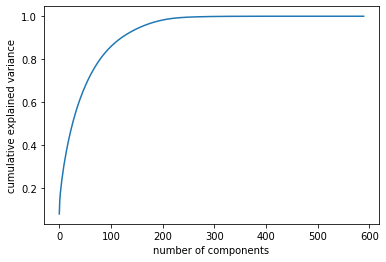

In [13]:
from sklearn.decomposition import PCA
pca = PCA().fit(data4_input_resampled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [ ]:
It is seen that 99% and above variance is attained around 200 components. Thus we transform the data and reduce the dimensions to 250.

In [22]:
pca = PCA(n_components=250)
pca.fit(data4_input_resampled)
x_pca_smt = pca.transform(data4_input_resampled)

In [240]:
pca = PCA(200)
pca.fit(data4_input_resampled)

PCA(n_components=200)

In [236]:
pca.n_components

250

In [233]:
pca.explained_variance_ratio_

array([0.0895802 , 0.05954935, 0.0304642 , 0.02314896, 0.02106125,
       0.01928735, 0.01828995, 0.01799392, 0.01724423, 0.01580054,
       0.01549332, 0.01411979, 0.01377209, 0.01356383, 0.01317235,
       0.01262273, 0.01211474, 0.01170022, 0.01129544, 0.01087978,
       0.01044593, 0.01032534, 0.00998681, 0.00983009, 0.0097193 ,
       0.00938008, 0.00922796, 0.00892771, 0.00876939, 0.0085541 ,
       0.00824868, 0.00810872, 0.00792364, 0.00779912, 0.00769709,
       0.00760271, 0.00732163, 0.00720393, 0.0069884 , 0.00690807,
       0.00659444, 0.00640323, 0.0063302 , 0.00622031, 0.00619716,
       0.00610027, 0.00597266, 0.00586314, 0.00566471, 0.00559952,
       0.00547994, 0.00539256, 0.00534335, 0.00521328, 0.00515233,
       0.00512542, 0.00494856, 0.00489724, 0.00482121, 0.00468741,
       0.00464384, 0.00446151, 0.00437673, 0.0043486 , 0.0042745 ,
       0.00426293, 0.00421578, 0.00416497, 0.00404331, 0.00392253,
       0.00390861, 0.00379859, 0.0037678 , 0.00372819, 0.00366

In [241]:
np.cumsum(pca.explained_variance_ratio_)

array([0.0895802 , 0.14912955, 0.17959375, 0.20274271, 0.22380396,
       0.24309131, 0.26138126, 0.27937517, 0.2966194 , 0.31241994,
       0.32791326, 0.34203305, 0.35580514, 0.36936896, 0.38254131,
       0.39516404, 0.40727878, 0.418979  , 0.43027444, 0.44115422,
       0.45160015, 0.46192549, 0.4719123 , 0.48174239, 0.49146168,
       0.50084176, 0.51006972, 0.51899743, 0.52776682, 0.53632092,
       0.5445696 , 0.55267833, 0.56060197, 0.56840109, 0.57609818,
       0.58370088, 0.59102252, 0.59822645, 0.60521485, 0.61212292,
       0.61871736, 0.62512059, 0.63145079, 0.63767111, 0.64386827,
       0.64996853, 0.65594119, 0.66180433, 0.66746904, 0.67306856,
       0.6785485 , 0.68394106, 0.68928441, 0.69449769, 0.69965002,
       0.70477545, 0.70972401, 0.71462125, 0.71944246, 0.72412987,
       0.72877372, 0.73323523, 0.73761196, 0.74196056, 0.74623505,
       0.75049798, 0.75471376, 0.75887873, 0.76292205, 0.76684457,
       0.77075318, 0.77455178, 0.77831957, 0.78204776, 0.78570

In [ ]:
Training and testing model on PCA transformed data:

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=42)

In [339]:
len(data4_output_resampled)

2926

In [337]:
size_train_org=len(y_train)
size_test_org=len(y_test)

In [338]:
size_train_org

2340

In [246]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [247]:
y_pred=model3.predict(x_test)

In [248]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[306,   0],
       [  3, 277]], dtype=int64)

In [ ]:
It is seen that all the -1 class values have been predicted correctly while 3 minorty class=1 have been incorrectly predicted.

In [ ]:
Obtaining the cross validation scores:

In [250]:
kf_normal1=KFold(n_splits=10,shuffle=True,random_state=42) 

In [251]:
model3=RandomForestClassifier()
result3=cross_val_score(model3,x_pca_smt,data4_output_resampled,cv=kf_normal1)

In [252]:
result3

array([0.99658703, 1.        , 0.99658703, 1.        , 0.99658703,
       1.        , 0.99315068, 0.99315068, 1.        , 0.99657534])

In [254]:
result3.mean()

0.9972637804478938

In [255]:
result3.std()

0.0025618473150117497

In [ ]:
The mean score obtained is 99.72%

In [ ]:
Carrying out hyperparameter tuning to improve model performance:

In [ ]:
Printing the model parameters to be tuned for Random Forest Classifier:

In [256]:
model3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
Defining the parameter grid to obtain the optimal parameters:

In [257]:
param_grid = { 
    'n_estimators': [100,200,300,400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,20],
    'criterion' :['gini', 'entropy']
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [260]:
model4=RandomForestClassifier(random_state=42)

In [ ]:
Fitting grid search cv on the model:

In [262]:
rf_cv = GridSearchCV(estimator=model4, param_grid=param_grid, cv= 5)
rf_cv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
Obtaining the optimal parameters:

In [263]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 300}

In [ ]:
Training the model with the optimal parameters:

In [145]:
model5=RandomForestClassifier(n_estimators=300,max_depth=10,criterion='gini',max_features='log2')
model5.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=300)

In [ ]:
Predicting the test inputs using the trained model:

In [278]:
y_pred_train_original=model5.predict(x_train)

In [279]:
y_pred_test_original=model5.predict(x_test)

In [281]:
acc_train_original=accuracy_score(y_train,y_pred_train_original)

In [282]:
acc_test_original=accuracy_score(y_test,y_pred_test_original)

In [ ]:
Generating the confusion matrix and classification report for the model:

In [146]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[306,   0],
       [  0, 280]], dtype=int64)

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       306
         1.0       1.00      1.00      1.00       280

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



In [ ]:
While the model seems to be perfectly trained, the chances that the model has been overfit are high.

In [ ]:
Carrying out Cross Validation on the model:

In [267]:
result4=cross_val_score(model5,x_pca_smt,data4_output_resampled,cv=kf_normal1)

In [268]:
result4

array([1.        , 1.        , 1.        , 1.        , 0.99658703,
       1.        , 0.99315068, 0.99315068, 1.        , 1.        ])

In [269]:
result4.mean()

0.9982888400579737

In [270]:
result4.std()

0.0027603244315045706

In [ ]:
A mean cross validation score of 99.82% has been obtained.

In [ ]:
data_smt=pd.DataFrame

In [271]:
len(x_pca_smt)

2926

In [ ]:
Training and testing on different samples to check for variation in the train and test accuracies:
    i)The data has been resampled for 3 iterations with replacement.
    ii)The data is trained each time and the model is tested on the test data
    iii)These accuracies are compared with the original model train and test accuracies using z-test and t-test.

In [ ]:
Generating samples from the dataset and training the model,following which the train and test accuracies are stored.

In [373]:
#bootstrap=[]
trainacc_list=[]
testacc_list=[]
size_train=[]
size_test=[]
for i in range(0,3):
    print(i)
    x,y=resample(x_pca_smt,data4_output_resampled,n_samples=len(x_pca_smt),replace=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i+10)
    size_train.append(len(x_train))
    size_test.append(len(x_test))
    model5=RandomForestClassifier(n_estimators=300,max_depth=10,criterion='gini',max_features='log2')
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainacc_list.append(accuracy_score(y_train,y_pred_train))
    testacc_list.append(accuracy_score(y_test,y_pred_test))
    #kf_normal1=KFold(n_splits=10,shuffle=True,random_state=42)
    #result=cross_val_score(model5,x,y,cv=kf_normal1)
    #bootstrap.append(result.mean())

0
1
2


In [298]:
len(x_pca_smt)

2926

In [366]:
i=0
kf_hypothesis=KFold(n_splits=3,shuffle=True,random_state=42)
size_train=[]
size_test=[]
trainacc_list=[]
testacc_list=[]
for train,test in kf_hypothesis.split(x_pca_smt,data4_output_resampled):
    print(i)
    size_train.append(len(train))
    size_test.append(len(test))
    x_train,y_train=x_pca_smt[train],data4_output_resampled[train]
    x_test,y_test=x_pca_smt[test],data4_output_resampled[test]
    model5=RandomForestClassifier(n_estimators=300,max_depth=10,criterion='gini',max_features='log2')
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainacc_list.append(accuracy_score(y_train,y_pred_train))
    testacc_list.append(accuracy_score(y_test,y_pred_test))
    i=i+1

0
1
2


In [367]:
trainaccorg_list=[]
testaccorg_list=[]
for i in range(0,3):
    x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=i+1)
    model5=RandomForestClassifier(n_estimators=300,max_depth=10,criterion='gini',max_features='log2')
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainaccorg_list.append(accuracy_score(y_train,y_pred_train))
    testaccorg_list.append(accuracy_score(y_test,y_pred_test))

In [ ]:
Using the t-test:
    The difference between the train accuracies for the sampled data and original data is computed for each iteration.
    The mean of the difference is taken following which the variance is calculating using the differences and the mean of the differences.
    The resulting variance is multiplied with (1/n + n2/n1) where n is the total number of samples while n2 is the length of the test samples and n1 is the length of the train samples.
    This factor is taken in to account in order to eliminate the false positive rate that can arise even with very small deviations between the accuracies.

In [ ]:
Generating the differences:

In [374]:
diff = [y - x for y, x in zip(trainaccorg_list, trainacc_list)]

In [375]:
diff

[0.0, -0.0012820512820512775, -0.00042735042735042583]

In [ ]:
Computing the mean and variance of the differences:

In [376]:
d_bar = np.mean(diff)

In [377]:
sigma2 = np.var(diff)

In [378]:
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)

In [ ]:
Multiplying the variance and adding the additional 1/n term:

In [382]:
sigma2_mod = sigma2 * (1/n + n2/n1)

In [ ]:
Computing the t-statistic:

In [383]:
t_static =  d_bar / np.sqrt(sigma2_mod)

In [386]:
t_static

-2.134808634949888

In [26]:
from scipy.stats import t

In [ ]:
Obtaining the p-value from the t statistic:
    if this p-value is greater than 0.005,it lies within the 95% confidence interval and thus we can conclude that the evaluated models are the same for both the sampled data and the original data.

In [385]:
from scipy.stats import t
#Compute p-value and plot the results 
Pvalue = ((1 - t.cdf(t_static, n-1))*100)
Pvalue

98.35702345579136

In [ ]:
Since the Pvalue*2>0.005, it lies within the 95% confidence interval.

In [388]:
diff = [y - x for y, x in zip(testaccorg_list, testacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*100)
Pvalue

21.676874454809326

In [ ]:
Pvalue*2=0.42 lies within the 95% confidence interval and thus we can conclude that the model is trained the same for both data.

In [149]:
from sklearn.metrics import accuracy_score

In [ ]:
ii)Z-test:
    In the z-test,the z-score=difference in accuracy values/standard deviation leads to extremely fluctuating results even with small deviation values.

In [ ]:
The printed result shows very less differences between the train acuracies as well astest accuracies however the z-score is extremely fluctuating.

In [351]:
z=[]
for i in range(0,3):
    print(i)
    err_train_original=acc_train_original
    print(err_train_original)
    err_train_sample=trainacc_list[i]
    print(err_train_sample)
    d=abs(err_train_original-err_train_sample)
    print(d)
    sd=(((err_train_original)*(1-err_train_original)/size_train_org)+((err_train_sample)*(1-err_train_sample)/size_train[i]))**0.5
    print(sd)
    z.append(d/sd)

0
0.9987179487179487
0.9995726495726496
0.0008547008547008517
0.0008542441617189011
1
0.9987179487179487
0.9987179487179487
0.0
0.0010461192536167087
2
0.9987179487179487
0.9982905982905983
0.00042735042735042583
0.0011297997859387712


In [352]:
z

[1.0005346164509121, 0.0, 0.3782532380242333]

In [344]:
z1=[]
for i in range(0,3):
    print(i)
    err_test_original=acc_test_original
    print(err_test_original)
    err_test_sample=testacc_list[i]
    print(err_test_sample)
    d=abs(err_test_original-err_test_sample)
    print(d)
    sd=(((err_test_original)*(1-err_test_original)/size_test_org)+((err_test_sample)*(1-err_test_sample)/size_test[i]))**0.5
    print(sd)
    z1.append(d/sd)

0
0.9965870307167235
0.9965870307167235
0.0
0.003407140125677208
1
0.9965870307167235
0.9931740614334471
0.0034129692832763903
0.004168111114331086
2
0.9965870307167235
0.9948805460750854
0.0017064846416381396
0.0038073411306682975


In [345]:
z1

[0.0, 0.8188287667144201, 0.44820902122279827]

In [ ]:
Thus we carry out the t-test for all the models to be trained below. 

In [ ]:
Training the data using all the supervised learning models in order to choose the best classifier:

In [ ]:
The models used are:
    i)Support Vector Classification
    ii)KNN
    iii)Decision Tree Classifier
    iv) Logistic Regression
    v)AdaBoost Classifier
    vi)Gradient Boost Classifier

In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
i)SVC:
    The model is first trained without tuning the hyperparameters following which gridsearch is carried out to find the optimal parameters:

In [393]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=42)
model_svc=SVC()
model_svc.fit(x_train,y_train)

SVC()

In [394]:
y_pred=model_svc.predict(x_test)

In [395]:
confusion_matrix(y_test,y_pred)

array([[302,   4],
       [  0, 280]], dtype=int64)

In [ ]:
The model without hyperparameter tuning has found to identify the class=1 values correctly with 4 incorrectly predicted class=-1 values.

In [ ]:
Hyperparameter tuning using GridSearch:

In [ ]:
Defining the parameter grid:

In [403]:
param_grid = {'C': [0.1,1,5, 10, 100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001],'kernel': ['rbf', 'poly', 'sigmoid','linear']}

In [404]:
grid = GridSearchCV(SVC(random_state=42),param_grid,refit=True,verbose=2,cv=3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.8s
[CV] END ......................C=0.1, gamma=1,

[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.9s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.6s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.6s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.6s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   1.3s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   1.6s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   1.8s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   1.1s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   1.1s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   1.3s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   0.9s
[CV] END .....................C=1, gamma=0.0001, kernel=poly; total time=   1.1s
[CV] END ...................

[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   1.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.8s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.7s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.7s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.5s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.4s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.4s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   2.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   1.4s
[CV] END ...................

[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   0.7s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.6s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.6s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.6s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   2.0s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   1.5s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   1.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.8s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.7s
[CV] END ...................

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 5, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [ ]:
Obtaining the best penalization and gamma values:

In [407]:
grid.best_params_

{'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}

In [408]:
model_svc=SVC(C=5,gamma=0.01,kernel='rbf')
model_svc.fit(x_train,y_train)

SVC(C=5, gamma=0.01)

In [409]:
y_pred=model_svc.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[306,   0],
       [  3, 277]], dtype=int64)

In [ ]:
The Hyperparameter tuning has caused the class=1 values to be predicted incorrecly.

In [411]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      1.00       306
         1.0       1.00      0.99      0.99       280

    accuracy                           0.99       586
   macro avg       1.00      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [ ]:
The precision and recall for class=-1 are 99% and 100% respectively with an F1 score of 100%
The precision and recall for class=-1 are 100% and 99% respectively with an F1 score of 99%

In [ ]:
Obtaining the cross validation scores:

In [427]:
kf_svc=KFold(n_splits=10,shuffle=True,random_state=42)
result=cross_val_score(model_svc,x_pca_smt,data4_output_resampled,cv=kf_svc)

In [428]:
result

array([1.        , 0.99658703, 1.        , 0.99658703, 0.99658703,
       0.99658703, 0.98972603, 0.99657534, 0.99657534, 0.99657534])

In [430]:
rkf_svc=RepeatedKFold(n_splits=5,n_repeats=10,random_state=42)
result=cross_val_score(model_svc,x_pca_smt,data4_output_resampled,cv=rkf_svc)

In [431]:
result

array([0.99488055, 0.99487179, 0.99316239, 0.98974359, 0.9982906 ,
       0.99488055, 0.9982906 , 0.9965812 , 0.99145299, 0.99487179,
       0.99658703, 0.9965812 , 0.99316239, 0.9965812 , 0.9982906 ,
       0.99146758, 0.9982906 , 0.99487179, 0.99487179, 0.9965812 ,
       0.99488055, 0.98803419, 0.9982906 , 0.9965812 , 0.9982906 ,
       0.99146758, 0.9982906 , 0.9965812 , 0.99316239, 0.9982906 ,
       0.99658703, 0.9982906 , 0.9982906 , 0.99487179, 0.9982906 ,
       0.99829352, 0.99487179, 0.9982906 , 0.99145299, 1.        ,
       0.99829352, 0.99487179, 0.9982906 , 0.9965812 , 0.99487179,
       0.99829352, 0.99487179, 0.9965812 , 0.9982906 , 0.99316239])

In [432]:
skf_svc = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
result=cross_val_score(model_svc,x_pca_smt,data4_output_resampled,cv=skf_svc)

In [433]:
result

array([0.99658703, 0.98976109, 0.99658703, 1.        , 0.99317406,
       0.99317406, 0.99657534, 0.99657534, 0.99657534, 1.        ])

In [ ]:
The cross validation scores seem to be good and lie within the range of 99% to 100%

In [ ]:
Carrying out the t-test for the train and test accuracies:

In [420]:
trainacc_list=[]
testacc_list=[]
size_train=[]
size_test=[]
for i in range(0,5):
    print(i)
    x,y=resample(x_pca_smt,data4_output_resampled,n_samples=len(x_pca_smt),replace=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i+10)
    size_train.append(len(x_train))
    size_test.append(len(x_test))
    model5=SVC(C=5,gamma=0.01,kernel='rbf')
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainacc_list.append(accuracy_score(y_train,y_pred_train))
    testacc_list.append(accuracy_score(y_test,y_pred_test))
    #kf_normal1=KFold(n_splits=10,shuffle=True,random_state=42)
    #result=cross_val_score(model5,x,y,cv=kf_normal1)
    #bootstrap.append(result.mean())

0
1
2
3
4


In [421]:
trainaccorg_list=[]
testaccorg_list=[]
for i in range(0,5):
    print(i)
    x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=i+1)
    model5=SVC(C=5,gamma=0.01,kernel='rbf')
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainaccorg_list.append(accuracy_score(y_train,y_pred_train))
    testaccorg_list.append(accuracy_score(y_test,y_pred_test))

0
1
2
3
4


In [422]:
print(trainaccorg_list, trainacc_list)

[1.0, 1.0, 1.0, 1.0, 1.0] [1.0, 1.0, 1.0, 1.0, 1.0]


In [414]:
diff = [y - x for y, x in zip(testaccorg_list, testacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

73.01063498713405

In [ ]:
p value=0.73 indicates that it lies within the 95% confidence interval and hence we can accept the null hypothesis that the models used are the same.

In [416]:
diff = [y - x for y, x in zip(trainaccorg_list, trainacc_list)]

In [424]:
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [415]:
diff = [y - x for y, x in zip(trainaccorg_list, trainacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


nan

In [ ]:
P value undefined indicates no variance between train accuracies of sampled and original data, thereby implying no difference in the model.

In [ ]:
Using KNN Classifier:
    i)Model is trained without hyperparameter tuning.

In [435]:
model_knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=1)
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [436]:
y_pred=model_knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 77 223]
 [  0 286]]
              precision    recall  f1-score   support

        -1.0       1.00      0.26      0.41       300
         1.0       0.56      1.00      0.72       286

    accuracy                           0.62       586
   macro avg       0.78      0.63      0.56       586
weighted avg       0.79      0.62      0.56       586



In [ ]:
The results are very bad with the default parameter of 5 neighbours. Thus the optimal elbow point is determined below.

In [441]:
error_rate = []
for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

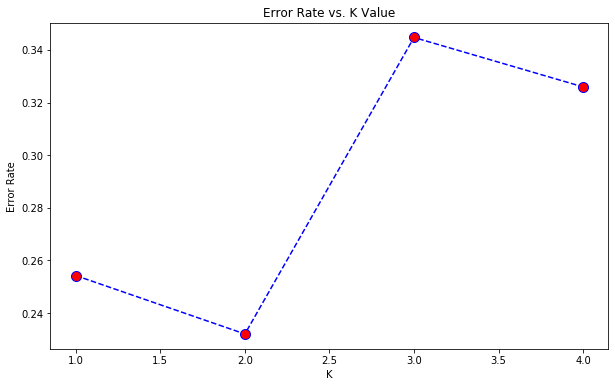

In [442]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
From the plot above, the error seems to be increasing as n_neighbours increases and the least error is found at n=2. Thus n is set to 2 for further training.

In [443]:
model_knn=KNeighborsClassifier(n_neighbors=2)
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=1)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [444]:
y_pred=model_knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[164 136]
 [  0 286]]
              precision    recall  f1-score   support

        -1.0       1.00      0.55      0.71       300
         1.0       0.68      1.00      0.81       286

    accuracy                           0.77       586
   macro avg       0.84      0.77      0.76       586
weighted avg       0.84      0.77      0.76       586



In [ ]:
The model seems to have improved slightly better with n=2. A gridsearch is carried out to find the optimal hyperparameters.

In [ ]:
Defining the parameter grid:

In [452]:
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [459]:
param_grid = {'n_neighbors': [0,1,2,3,4,5], 'weights': ['uniform','distance'],'metric': ['euclidian','manhattan','chebyshev','minkowski']}

In [460]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=2,cv=3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ...metric=euclidian, n_neighbors=0, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidian, n_neighbors=0, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidian, n_neighbors=0, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=0, weights=distance; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=0, weights=distance; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=0, weights=distance; total time=   0.0s
[CV] END ...metric=euclidian, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidian, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidian, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=1, wei

C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.


[CV] END ...metric=euclidian, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidian, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidian, n_neighbors=4, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidian, n_neighbors=4, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidian, n_neighbors=4, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END ..metric=euclidian, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END ...metric=euclidian, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidian

C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.


C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_base.py", line 516, in _fit
    self.n_neighbors
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

[CV] END ..metric=manhattan, n_neighbors=0, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=0, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.5s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.5s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.4s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.4s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.6s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.6s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.5s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.5s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.5s
[CV] END ..metric=manhattan,

C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_base.py", line 516, in _fit
    self.n_neighbors
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

[CV] END ...metric=chebyshev, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ...metric=chebyshev, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ...metric=chebyshev, n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ..metric=chebyshev, n_neighbors=1, weights=distance; total time=   0.5s
[CV] END ..metric=chebyshev, n_neighbors=1, weights=distance; total time=   0.5s
[CV] END ..metric=chebyshev, n_neighbors=1, weights=distance; total time=   0.5s
[CV] END ...metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.5s
[CV] END ...metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.8s
[CV] END ...metric=chebyshev, n_neighbors=2, weights=uniform; total time=   0.6s
[CV] END ..metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.6s
[CV] END ..metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.5s
[CV] END ..metric=chebyshev, n_neighbors=2, weights=distance; total time=   0.5s
[CV] END ...metric=chebyshev

C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\neighbors\_base.py", line 516, in _fit
    self.n_neighbors
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   1.4s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.1s
[CV] END ...metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.1s
[CV] END ..metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski

C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.61324786 0.61324786 0.63119658 0.61324786
 0.54957265 0.54957265 0.5542735  0.5525641  0.52264957 0.52264957
        nan        nan 0.83589744 0.83589744 0.89145299 0.83589744
 0.83119658 0.83119658 0.86324786 0.83376068 0.82008547 0.82264957
        nan        nan 0.70811966 0.70811966 0.73376068 0.70811966
 0.63333333 0.63333333 0.65128205 0.64145299 0.59188034 0.59316239]
  category=UserWarning


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidian', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [0, 1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [ ]:
Obtaining the best hyperparameters and training the model with the same:

In [461]:
grid.best_params_

{'metric': 'chebyshev', 'n_neighbors': 2, 'weights': 'uniform'}

In [478]:
model_knn=KNeighborsClassifier(n_neighbors=2,metric='chebyshev',p=2,weights='uniform')
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=1)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='chebyshev', n_neighbors=2)

In [479]:
y_pred=model_knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[242  58]
 [  2 284]]
              precision    recall  f1-score   support

        -1.0       0.99      0.81      0.89       300
         1.0       0.83      0.99      0.90       286

    accuracy                           0.90       586
   macro avg       0.91      0.90      0.90       586
weighted avg       0.91      0.90      0.90       586



In [ ]:
From the confusion matrix and classification report above, a great improvement is seen as compared to original knn model. However, it is not seen to be a good estimator for the data.

In [ ]:
Generating the cross validation scores using Kfold,Repeated KFold and Stratified Kfold:

In [480]:
kf_knn=KFold(n_splits=10,shuffle=True,random_state=42)
result=cross_val_score(model_knn,x_pca_smt,data4_output_resampled,cv=kf_knn)

In [481]:
result

array([0.91467577, 0.87713311, 0.92150171, 0.87030717, 0.90443686,
       0.92150171, 0.91438356, 0.88013699, 0.9109589 , 0.90410959])

In [484]:
rkf_knn=RepeatedKFold(n_splits=5,n_repeats=10,random_state=42)
result=cross_val_score(model_knn,x_pca_smt,data4_output_resampled,cv=rkf_knn)

In [485]:
result

array([0.89249147, 0.89401709, 0.8991453 , 0.8974359 , 0.9025641 ,
       0.90102389, 0.87863248, 0.87863248, 0.90769231, 0.92649573,
       0.91296928, 0.8957265 , 0.8974359 , 0.89059829, 0.8957265 ,
       0.89249147, 0.88888889, 0.90940171, 0.90598291, 0.90769231,
       0.89761092, 0.87350427, 0.8991453 , 0.8957265 , 0.9008547 ,
       0.8890785 , 0.90769231, 0.89059829, 0.8991453 , 0.89059829,
       0.90102389, 0.88888889, 0.9008547 , 0.92649573, 0.88034188,
       0.89931741, 0.9008547 , 0.89230769, 0.9025641 , 0.89401709,
       0.89419795, 0.90598291, 0.87179487, 0.91282051, 0.9042735 ,
       0.90102389, 0.91282051, 0.90769231, 0.88888889, 0.89230769])

In [486]:
skf_knn = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
result=cross_val_score(model_knn,x_pca_smt,data4_output_resampled,cv=skf_knn)

In [487]:
result

array([0.89078498, 0.89761092, 0.90102389, 0.92491468, 0.89419795,
       0.91808874, 0.89726027, 0.89383562, 0.86986301, 0.88356164])

In [ ]:
The CV scores are found to lie between 88% to 93% which is not good.

In [ ]:
Carrying out the t-test for train and test accuracies:

In [488]:
trainacc_list=[]
testacc_list=[]
size_train=[]
size_test=[]
for i in range(0,5):
    print(i)
    x,y=resample(x_pca_smt,data4_output_resampled,n_samples=len(x_pca_smt),replace=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i+10)
    size_train.append(len(x_train))
    size_test.append(len(x_test))
    model5=model_knn
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainacc_list.append(accuracy_score(y_train,y_pred_train))
    testacc_list.append(accuracy_score(y_test,y_pred_test))
    #kf_normal1=KFold(n_splits=10,shuffle=True,random_state=42)
    #result=cross_val_score(model5,x,y,cv=kf_normal1)
    #bootstrap.append(result.mean())

0
1
2
3
4


In [489]:
trainaccorg_list=[]
testaccorg_list=[]
for i in range(0,5):
    print(i)
    x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=i+1)
    model5=model_knn
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainaccorg_list.append(accuracy_score(y_train,y_pred_train))
    testaccorg_list.append(accuracy_score(y_test,y_pred_test))

0
1
2
3
4


In [ ]:
t-test for train accuracies:

In [490]:
diff = [y - x for y, x in zip(trainaccorg_list, trainacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

68.35812196130826

In [ ]:
p-value=0.68 which lies within 95% CI.

In [ ]:
t-test for test accuracies:

In [491]:
diff = [y - x for y, x in zip(testaccorg_list, testacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

200.0

In [ ]:
p-value=2 which lies within 95% CI.

In [ ]:
Using Decision Tree Classifier:

In [ ]:
Training the model without hyperparameter tuning:

In [492]:
model_dt=DecisionTreeClassifier()

In [493]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=42)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [494]:
y_pred=model_dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[285  21]
 [  7 273]]
              precision    recall  f1-score   support

        -1.0       0.98      0.93      0.95       306
         1.0       0.93      0.97      0.95       280

    accuracy                           0.95       586
   macro avg       0.95      0.95      0.95       586
weighted avg       0.95      0.95      0.95       586



In [ ]:
The confusion matrix and classification reports seem to be average without hyperparameter tuning.

In [ ]:
Carrying out the hyperparameter tuning:

In [495]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
Defining the parameter grid:

In [512]:
param_grid = { 
    
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,5,10,15,20,30,40,50,None],
    'criterion' :['gini', 'entropy'],'min_samples_leaf':[1, 5, 10, 20, 50, 100]
}

In [530]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,refit=True,scoring='f1_micro' ,verbose=3,cv=3,return_train_score=True)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 1/3] END criterion=gini, max_d

[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1; total t

[CV 1/3] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=20; total

[CV 1/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=50; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=50; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=50; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5; 

[CV 1/3] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=20; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=20; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=20; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=50; to

[CV 3/3] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=50; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=5; to

[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=20; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=20; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=20; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=50; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=50; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=50; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=100; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=100; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=100; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqr

[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=10; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=10; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=20; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=20; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=20; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=50; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=50; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=50; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=100; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=15, max_feat

[CV 2/3] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=10; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=

[CV 3/3] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=20; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=50; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=50; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=50; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=100; total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=50, max_feat

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20, 30, 40, 50, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [ ]:
Obtaining the optimal hyperparameters and training with the same:

In [531]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1}

In [532]:
model_dt=DecisionTreeClassifier(criterion='entropy',max_features='auto',max_depth=20)

In [533]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto')

In [534]:
y_pred=model_dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[289  17]
 [ 10 270]]
              precision    recall  f1-score   support

        -1.0       0.97      0.94      0.96       306
         1.0       0.94      0.96      0.95       280

    accuracy                           0.95       586
   macro avg       0.95      0.95      0.95       586
weighted avg       0.95      0.95      0.95       586



In [ ]:
There is not much improvement although the F1 score,precision and recall values seem to have increased slightly for class=-1 values.
Thus the decision tree seems to be an average estimator for the data.

In [ ]:
Obtaining cross validation scores using kfold, repeated and stratified kfold:

In [535]:
kf_dt=KFold(n_splits=10,shuffle=True,random_state=42)
result=cross_val_score(model_dt,x_pca_smt,data4_output_resampled,cv=kf_dt)

In [536]:
result

array([0.93515358, 0.95221843, 0.94539249, 0.9556314 , 0.94197952,
       0.96245734, 0.91438356, 0.90753425, 0.95890411, 0.95547945])

In [537]:
rkf_dt=RepeatedKFold(n_splits=5,n_repeats=10,random_state=42)
result=cross_val_score(model_dt,x_pca_smt,data4_output_resampled,cv=rkf_dt)

In [538]:
result

array([0.90955631, 0.93333333, 0.92478632, 0.93162393, 0.92307692,
       0.94027304, 0.91794872, 0.93333333, 0.93504274, 0.93333333,
       0.92320819, 0.94188034, 0.92820513, 0.93162393, 0.94358974,
       0.91638225, 0.94358974, 0.92478632, 0.95555556, 0.92649573,
       0.92491468, 0.92820513, 0.93675214, 0.92649573, 0.96581197,
       0.93174061, 0.93504274, 0.93162393, 0.93162393, 0.92307692,
       0.92832765, 0.93504274, 0.91794872, 0.92136752, 0.94358974,
       0.93686007, 0.92820513, 0.94529915, 0.92991453, 0.95384615,
       0.92320819, 0.92649573, 0.93846154, 0.94017094, 0.92478632,
       0.92662116, 0.94017094, 0.94529915, 0.93162393, 0.95384615])

In [539]:
skf_dt = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
result=cross_val_score(model_dt,x_pca_smt,data4_output_resampled,cv=skf_dt)

In [540]:
result

array([0.94539249, 0.95221843, 0.92832765, 0.9556314 , 0.94197952,
       0.93515358, 0.92465753, 0.94178082, 0.93835616, 0.94520548])

In [ ]:
The scores seem to lie between 90-95% which is fairly decent.

In [ ]:
Carrying out the t-test:

In [541]:
trainacc_list=[]
testacc_list=[]
size_train=[]
size_test=[]
for i in range(0,5):
    print(i)
    x,y=resample(x_pca_smt,data4_output_resampled,n_samples=len(x_pca_smt),replace=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i+10)
    size_train.append(len(x_train))
    size_test.append(len(x_test))
    model5=model_dt
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainacc_list.append(accuracy_score(y_train,y_pred_train))
    testacc_list.append(accuracy_score(y_test,y_pred_test))
    #kf_normal1=KFold(n_splits=10,shuffle=True,random_state=42)
    #result=cross_val_score(model5,x,y,cv=kf_normal1)
    #bootstrap.append(result.mean())

0
1
2
3
4


In [542]:
trainaccorg_list=[]
testaccorg_list=[]
for i in range(0,5):
    print(i)
    x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=i+1)
    model5=model_dt
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainaccorg_list.append(accuracy_score(y_train,y_pred_train))
    testaccorg_list.append(accuracy_score(y_test,y_pred_test))

0
1
2
3
4


In [ ]:
Implementing t-test for train accuracies:

In [543]:
diff = [y - x for y, x in zip(trainaccorg_list, trainacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

13.431964108940452

In [ ]:
p-value=0.134>0.005 and thus lies within 95% CI.

In [ ]:
Implementing t-test for test accuracies:

In [544]:
diff = [y - x for y, x in zip(testaccorg_list, testacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

199.99760820669556

In [ ]:
p-value=1.99 which lies within 95% CI.

In [ ]:
Using AdaBoost Classifier:
    Model is first trained without tuning the hyperparameters:

In [545]:
model_ab=AdaBoostClassifier()

In [546]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=1)
model_ab.fit(x_train,y_train)

AdaBoostClassifier()

In [547]:
y_pred=model_ab.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[291   9]
 [  4 282]]
              precision    recall  f1-score   support

        -1.0       0.99      0.97      0.98       300
         1.0       0.97      0.99      0.98       286

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586



In [ ]:
The results seem to be fairly good without tuning.

In [ ]:
Hyperparameter tuning using gridsearch:

In [548]:
model_ab.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
Defining the parameter grid:

In [551]:
param_grid = { 
    'algorithm' : ['SAMME', 'SAMME.R'],
    'n_estimators' : [10, 50, 100, 500],
'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

In [553]:
grid = GridSearchCV(AdaBoostClassifier(random_state=42),param_grid,refit=True,scoring='f1_micro' ,verbose=3,cv=3,return_train_score=True)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   1.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   3.9s
[CV 2/3] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   3.9s
[CV 3/3] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   3.8s
[CV 1/3] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   8.5s
[CV 2/3] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   8.2s
[CV 3/3] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   8.3s
[CV 1/3] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=  43.2s
[CV 2/3] END algorithm=SAMME, learning_rate=0.0001, n_

[CV 1/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=500; total time=  39.4s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=500; total time=  39.3s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=500; total time=  39.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=10; total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=10; total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=10; total time=   0.7s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   3.9s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   3.9s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   3.8s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time=   7.8s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time=   7.8s
[CV 3/3] END algorithm=SAMME.R, lea

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [ ]:
Obtaining the best parameters and training the model with the same:

In [555]:
grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 500}

In [556]:
model_ab=AdaBoostClassifier(learning_rate=1,n_estimators=500)

In [557]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=1)
model_ab.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=500)

In [ ]:
Generating the confusion matrix and classification reports:

In [558]:
y_pred=model_ab.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[299   1]
 [  4 282]]
              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99       300
         1.0       1.00      0.99      0.99       286

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [ ]:
While there seems to be an improvement in the F1 score,precision and recall of class=-1 values, there is no improvement in the prediction of class=1 values.


In [ ]:
Since the repeated k fold is highly time consuming with boosting classifiers using 500 estimators, only the normal kfold and stratified kfold CV have been carried out:

In [562]:
kf_ab=KFold(n_splits=10,shuffle=True,random_state=42)
result=cross_val_score(model_ab,x_pca_smt,data4_output_resampled,cv=kf_ab)

In [563]:
result

array([0.99317406, 0.98634812, 1.        , 1.        , 0.99658703,
       1.        , 0.99657534, 0.98287671, 0.99315068, 0.99315068])

In [601]:
skf_ab = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
result=cross_val_score(model_ab,x_pca_smt,data4_output_resampled,cv=skf_ab)

In [602]:
result

array([0.98976109, 0.98634812, 0.99658703, 0.99658703, 0.99658703,
       0.99658703, 1.        , 0.98972603, 0.99657534, 0.99657534])

In [ ]:
The results seem to be good between 99%-100% CV Scores.

In [ ]:
Carrying out t-test for train and test accuracies:

In [565]:
trainacc_list=[]
testacc_list=[]
size_train=[]
size_test=[]
for i in range(0,5):
    print(i)
    x,y=resample(x_pca_smt,data4_output_resampled,n_samples=len(x_pca_smt),replace=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i+10)
    size_train.append(len(x_train))
    size_test.append(len(x_test))
    model5=model_ab
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainacc_list.append(accuracy_score(y_train,y_pred_train))
    testacc_list.append(accuracy_score(y_test,y_pred_test))
    #kf_normal1=KFold(n_splits=10,shuffle=True,random_state=42)
    #result=cross_val_score(model5,x,y,cv=kf_normal1)
    #bootstrap.append(result.mean())

0
1
2
3
4


In [567]:
trainaccorg_list=[]
testaccorg_list=[]
for i in range(0,5):
    print(i)
    x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=i+1)
    model5=model_ab
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainaccorg_list.append(accuracy_score(y_train,y_pred_train))
    testaccorg_list.append(accuracy_score(y_test,y_pred_test))

0
1
2
3
4


In [ ]:
t-test for train accuracies:

In [571]:
diff = [y - x for y, x in zip(trainaccorg_list, trainacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


nan

In [ ]:
The accuracies have found to be exactly the same and thus the variance=0 due to which pvalue=nan.

In [573]:
np.mean(diff)

0.0

In [ ]:
t-test for test accuracies:

In [569]:
diff = [y - x for y, x in zip(testaccorg_list, testacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

168.18636323100475

In [ ]:
The p-value=1.68>0.005 and thus lies within 95% CI.

In [ ]:
Using GradientBoostingClassifier:
    The model is first trained with 200 estimators before hyperparameter tuning.

In [579]:
model_gb=GradientBoostingClassifier(n_estimators=200)

In [580]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=42)
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [581]:
y_pred=model_gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[305   1]
 [  1 279]]
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       306
         1.0       1.00      1.00      1.00       280

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



In [ ]:
The above confusion matrix and classification reports seem to indicate good predictions. Hyperparameter tuning is carried out to obtain a better performance.

In [578]:
model_gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
Defining the parameter grid for tuning:

In [586]:
param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1,0.5],
    "max_depth":[3,5,8,10,20],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mse"],
    
    "n_estimators":[10,50,100,200,500]
    }

In [587]:
grid = GridSearchCV(GradientBoostingClassifier(random_state=42),param_grid,refit=True,scoring='f1_micro' ,verbose=3,cv=3,return_train_score=True)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
[CV 1/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, n_estimators=10; total time=   0.1s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, n_estimators=10; total time=   0.0s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, n_estimators=10; total time=   0.0s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, n_estimators=50; total time=   0.3s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, n_estimators=50; total time=   0.3s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, n_estimators=50; total time=   0.3s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_feature

[CV 2/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=500; total time=  10.4s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=500; total time=  10.5s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, n_estimators=10; total time=   0.2s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, n_estimators=10; total time=   0.2s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, n_estimators=10; total time=   0.2s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, n_estimators=50; total time=   1.2s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=8, max_features=log2, n_estimators=50; total time=   1.2s
[CV 3/3] END crite

[CV 1/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=500; total time=  26.8s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=500; total time=  27.3s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=500; total time=  27.1s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=20, max_features=log2, n_estimators=10; total time=   0.3s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=20, max_features=log2, n_estimators=10; total time=   0.3s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=20, max_features=log2, n_estimators=10; total time=   0.3s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=20, max_features=log2, n_estimators=50; total time=   2.1s
[CV 2/3] E

[CV 3/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=200; total time=   2.6s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=500; total time=   6.4s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=500; total time=   6.3s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=500; total time=   6.4s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, n_estimators=10; total time=   0.0s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, n_estimators=10; total time=   0.0s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, n_estimators=10; total time=   0.0s
[CV 1/3] END cri

[CV 2/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=200; total time=   7.6s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=200; total time=   7.5s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=500; total time=  19.8s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=500; total time=  19.8s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=500; total time=  19.7s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=10, max_features=log2, n_estimators=10; total time=   0.3s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=10, max_features=log2, n_estimators=10; total time=   0.3s
[CV 3/3] END 

[CV 3/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=100; total time=   6.3s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=200; total time=  13.3s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=200; total time=  12.3s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=200; total time=  13.2s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=500; total time=  35.6s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=500; total time=  32.9s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=500; total time=  35.4s
[CV 1/

[CV 2/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=100; total time=   2.1s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=100; total time=   2.0s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=200; total time=   4.2s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=200; total time=   4.3s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=200; total time=   4.5s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=500; total time=  10.9s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=500; total time=  11.8s
[CV 3/3] END criteri

[CV 1/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=100; total time=   5.3s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=100; total time=   5.4s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=100; total time=   5.3s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=200; total time=  10.9s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=200; total time=  11.2s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=200; total time=  11.2s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=500; total time=  28.5s
[CV 2/3] END 

[CV 3/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.5s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=200; total time=   2.5s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=200; total time=   2.6s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=200; total time=   2.7s
[CV 1/3] END criterio

[CV 2/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=50; total time=   1.8s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=50; total time=   1.8s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=100; total time=   3.5s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=100; total time=   4.1s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=100; total time=   3.7s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=200; total time=   7.4s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=200; total time=   7.4s
[CV 3/3] END criterion

[CV 1/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=50; total time=   3.2s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=50; total time=   3.3s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=50; total time=   3.4s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=100; total time=   6.5s
[CV 2/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=100; total time=   6.3s
[CV 3/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=100; total time=   6.2s
[CV 1/3] END criterion=friedman_mse, learning_rate=0.5, loss=deviance, max_depth=20, max_features=sqrt, n_estimators=200; total time=  12.3s
[CV 2/3] END cri

[CV 3/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=50; total time=   1.0s
[CV 1/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=100; total time=   2.1s
[CV 2/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=100; total time=   2.1s
[CV 3/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=100; total time=   2.0s
[CV 1/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=200; total time=   4.3s
[CV 2/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=200; total time=   4.4s
[CV 3/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=200; total time=   4.5s
[CV 1/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=5, m

[CV 3/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=100; total time=   5.3s
[CV 1/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=200; total time=  10.8s
[CV 2/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=200; total time=  11.0s
[CV 3/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=200; total time=  11.8s
[CV 1/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=500; total time=  29.4s
[CV 2/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=500; total time=  28.0s
[CV 3/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=500; total time=  27.5s
[CV 1/3] END criterion=mse, learning_rate=0.01, loss=deviance, max_de

[CV 2/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=200; total time=   2.8s
[CV 3/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=200; total time=   2.8s
[CV 1/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=500; total time=   7.0s
[CV 2/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=500; total time=   6.8s
[CV 3/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=500; total time=   6.8s
[CV 1/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, n_estimators=10; total time=   0.1s
[CV 2/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, n_estimators=10; total time=   0.1s
[CV 3/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=5, ma

[CV 2/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=500; total time=  20.3s
[CV 3/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=500; total time=  19.9s
[CV 1/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=10, max_features=log2, n_estimators=10; total time=   0.3s
[CV 2/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=10, max_features=log2, n_estimators=10; total time=   0.3s
[CV 3/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=10, max_features=log2, n_estimators=10; total time=   0.3s
[CV 1/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=10, max_features=log2, n_estimators=50; total time=   1.9s
[CV 2/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=10, max_features=log2, n_estimators=50; total time=   1.9s
[CV 3/3] END criterion=mse, learning_rate=0.05, loss=deviance, max_depth=10,

[CV 2/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10; total time=   0.0s
[CV 3/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10; total time=   0.0s
[CV 1/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=50; total time=   0.3s
[CV 2/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=50; total time=   0.3s
[CV 3/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=50; total time=   0.3s
[CV 1/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=100; total time=   0.7s
[CV 2/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=100; total time=   0.7s
[CV 3/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=

[CV 2/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, n_estimators=50; total time=   1.2s
[CV 3/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, n_estimators=50; total time=   1.3s
[CV 1/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, n_estimators=100; total time=   2.6s
[CV 2/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, n_estimators=100; total time=   2.6s
[CV 3/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, n_estimators=100; total time=   2.6s
[CV 1/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, n_estimators=200; total time=   5.0s
[CV 2/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=log2, n_estimators=200; total time=   5.3s
[CV 3/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=8, max_featur

[CV 2/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=20, max_features=log2, n_estimators=100; total time=   4.6s
[CV 3/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=20, max_features=log2, n_estimators=100; total time=   4.9s
[CV 1/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=20, max_features=log2, n_estimators=200; total time=  11.3s
[CV 2/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=20, max_features=log2, n_estimators=200; total time=   9.9s
[CV 3/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=20, max_features=log2, n_estimators=200; total time=  11.8s
[CV 1/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=20, max_features=log2, n_estimators=500; total time=  34.3s
[CV 2/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=20, max_features=log2, n_estimators=500; total time=  29.5s
[CV 3/3] END criterion=mse, learning_rate=0.1, loss=deviance, max_depth=20, 

[CV 2/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, n_estimators=200; total time=   2.6s
[CV 3/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, n_estimators=200; total time=   2.3s
[CV 1/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, n_estimators=500; total time=   6.1s
[CV 2/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, n_estimators=500; total time=   6.3s
[CV 3/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, n_estimators=500; total time=   6.0s
[CV 1/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV 2/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.2s
[CV 3/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=5, max_featur

[CV 2/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=10, max_features=log2, n_estimators=500; total time=  13.8s
[CV 3/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=10, max_features=log2, n_estimators=500; total time=  13.3s
[CV 1/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.4s
[CV 2/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.4s
[CV 3/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.4s
[CV 1/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=50; total time=   2.4s
[CV 2/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=10, max_features=sqrt, n_estimators=50; total time=   2.5s
[CV 3/3] END criterion=mse, learning_rate=0.5, loss=deviance, max_depth=10, max_f

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8, 10, 20],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10, 50, 100, 200, 500]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [ ]:
Obtaining the best parameters:

In [588]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [590]:
model_gb=GradientBoostingClassifier(max_depth=8,max_features='sqrt',n_estimators=500,learning_rate=0.01)

In [591]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=42)
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features='sqrt',
                           n_estimators=500)

In [592]:
y_pred=model_gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[306   0]
 [  2 278]]
              precision    recall  f1-score   support

        -1.0       0.99      1.00      1.00       306
         1.0       1.00      0.99      1.00       280

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



In [ ]:
While all class=-1 values have been predicted correctly, 2 values belonging to class=1 have not been predicted,thereby leading to slight decrease in precision and recall.

In [ ]:
Carrying out cross validation using kfold and stratified kfold. Repeated kfold has not been carried out since it is highly time consuming with 500 estimators.

In [593]:
kf_gb=KFold(n_splits=10,shuffle=True,random_state=42)
result=cross_val_score(model_gb,x_pca_smt,data4_output_resampled,cv=kf_gb)

In [594]:
result

array([1.        , 1.        , 0.99658703, 1.        , 0.99658703,
       1.        , 0.99657534, 0.98972603, 1.        , 1.        ])

In [599]:
skf_gb = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
result=cross_val_score(model_gb,x_pca_smt,data4_output_resampled,cv=skf_gb)

In [600]:
result

array([1.        , 0.98976109, 1.        , 0.99658703, 0.99658703,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [ ]:
The cross validation scores seem to yield 100% in many folds and seems to be a good estimator.

In [ ]:
Carrying out t-test for train and test accuracies:

In [595]:
trainacc_list=[]
testacc_list=[]
size_train=[]
size_test=[]
for i in range(0,5):
    print(i)
    x,y=resample(x_pca_smt,data4_output_resampled,n_samples=len(x_pca_smt),replace=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i+10)
    size_train.append(len(x_train))
    size_test.append(len(x_test))
    model5=model_gb
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainacc_list.append(accuracy_score(y_train,y_pred_train))
    testacc_list.append(accuracy_score(y_test,y_pred_test))
    #kf_normal1=KFold(n_splits=10,shuffle=True,random_state=42)
    #result=cross_val_score(model5,x,y,cv=kf_normal1)
    #bootstrap.append(result.mean())

0
1
2
3
4


In [596]:
trainaccorg_list=[]
testaccorg_list=[]
for i in range(0,5):
    print(i)
    x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=i+1)
    model5=model_gb
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainaccorg_list.append(accuracy_score(y_train,y_pred_train))
    testaccorg_list.append(accuracy_score(y_test,y_pred_test))

0
1
2
3
4


In [ ]:
t-test for train accuracies:

In [597]:
diff = [y - x for y, x in zip(trainaccorg_list, trainacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


nan

In [ ]:
Since variance is 0 due to exact same accuracies, an undefined p-value is obtained.

In [ ]:
t-test for test accuracies:

In [598]:
diff = [y - x for y, x in zip(testaccorg_list, testacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

135.3104984983248

In [ ]:
p-value=1.35>0.005 and thus lies within the 95% confidence interval.

In [ ]:
Using Logistic Regression:
    The model is trained with maximum iterations set as 1000.

In [607]:
model_lr=LogisticRegression(max_iter=1000)

In [608]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=42)
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [609]:
y_pred=model_lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[254  52]
 [  2 278]]
              precision    recall  f1-score   support

        -1.0       0.99      0.83      0.90       306
         1.0       0.84      0.99      0.91       280

    accuracy                           0.91       586
   macro avg       0.92      0.91      0.91       586
weighted avg       0.92      0.91      0.91       586



In [ ]:
The results do not seem to be good and thus will be tuned for further improvement in performance.

In [ ]:
Defining the parameter grid:

In [615]:
param_grid = {
   'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l1','l2'],
'C' : [100, 10, 1.0, 0.1, 0.01]
    }

In [617]:
grid = GridSearchCV(LogisticRegression(max_iter=1000),param_grid,refit=True,scoring='f1_micro' ,verbose=3,cv=3,return_train_score=True)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END ............C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/3] END ............C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/3] END ............C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/3] END ................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/3] END ................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/3] END ................C=100, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on 

[CV 1/3] END ............C=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV 2/3] END ............C=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV 3/3] END ............C=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV 1/3] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.5s
[CV 2/3] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.6s
[CV 3/3] END ............C=100, penalty=l2, solver=newton-cg; total time=   0.7s
[CV 1/3] END ................C=100, penalty=l2, solver=lbfgs; total time=   0.5s
[CV 2/3] END ................C=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV 3/3] END ................C=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV 1/3] END ............C=100, penalty=l2, solver=liblinear; total time=   0.5s
[CV 2/3] END ............C=100, penalty=l2, solver=liblinear; total time=   0.9s
[CV 3/3] END ............C=100, penalty=l2, solver=liblinear; total time=   0.7s
[CV 1/3] END .............C=

C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on 

[CV 1/3] END .............C=10, penalty=l1, solver=liblinear; total time=   0.9s
[CV 2/3] END .............C=10, penalty=l1, solver=liblinear; total time=   1.1s
[CV 3/3] END .............C=10, penalty=l1, solver=liblinear; total time=   0.6s
[CV 1/3] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.4s
[CV 2/3] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.5s
[CV 3/3] END .............C=10, penalty=l2, solver=newton-cg; total time=   0.4s
[CV 1/3] END .................C=10, penalty=l2, solver=lbfgs; total time=   0.4s
[CV 2/3] END .................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV 3/3] END .................C=10, penalty=l2, solver=lbfgs; total time=   0.4s
[CV 1/3] END .............C=10, penalty=l2, solver=liblinear; total time=   0.5s
[CV 2/3] END .............C=10, penalty=l2, solver=liblinear; total time=   0.6s
[CV 3/3] END .............C=10, penalty=l2, solver=liblinear; total time=   0.5s
[CV 1/3] END ............C=1

C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on 

[CV 1/3] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.4s
[CV 2/3] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.6s
[CV 3/3] END ............C=1.0, penalty=l1, solver=liblinear; total time=   0.4s
[CV 1/3] END ............C=1.0, penalty=l2, solver=newton-cg; total time=   0.3s
[CV 2/3] END ............C=1.0, penalty=l2, solver=newton-cg; total time=   0.4s
[CV 3/3] END ............C=1.0, penalty=l2, solver=newton-cg; total time=   0.3s
[CV 1/3] END ................C=1.0, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 2/3] END ................C=1.0, penalty=l2, solver=lbfgs; total time=   0.1s
[CV 3/3] END ................C=1.0, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 1/3] END ............C=1.0, penalty=l2, solver=liblinear; total time=   0.4s
[CV 2/3] END ............C=1.0, penalty=l2, solver=liblinear; total time=   0.3s
[CV 3/3] END ............C=1.0, penalty=l2, solver=liblinear; total time=   0.3s
[CV 1/3] END ............C=0

C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on 

[CV 2/3] END ............C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/3] END ............C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/3] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 2/3] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.2s
[CV 3/3] END ............C=0.1, penalty=l2, solver=newton-cg; total time=   0.3s
[CV 1/3] END ................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/3] END ................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/3] END ................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/3] END ............C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV 2/3] END ............C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV 3/3] END ............C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV 1/3] END ...........C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/3] END ...........C=0.

C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on 

[CV 1/3] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 2/3] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/3] END ...........C=0.01, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 1/3] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/3] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/3] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/3] END ...........C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/3] END ...........C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/3] END ...........C=0.01, penalty=l2, solver=liblinear; total time=   0.0s


C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.92564103 0.92393162 0.92393162 0.92136752
        nan        nan 0.92179487 0.92393162 0.92393162 0.92222222
        nan        nan 0.91367521 0.91880342 0.91880342 0.91837607
        nan        nan 0.87222222 0.9034188  0.9034188  0.9025641
        nan        nan 0.72393162 0.87606838 0.87606838 0.87521368]
  category=UserWarning
C:\Program Files\Python37\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the train scores are non-finite: [       nan        nan 1.         1.         1.         1.
        nan        nan 1.         1.         1.         1.
        nan        nan 0.98482906 0.98717949 0.98717949 0.98611111
        nan        nan 0.92307692 0.96431624 0.96431624 0.96217949
        nan        nan 0.73333333 0.92222222 0.92222222 0.92200855]
  category=UserWarning


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [ ]:
Obtaining the best parameters:

In [618]:
grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
Training the model with the optimal hyperparameters:

In [20]:
model_lr=LogisticRegression(C=100,penalty='l1',solver='liblinear',max_iter=1000)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=42)
model_lr.fit(x_train,y_train)

LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear')

In [36]:
y_pred=model_lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[260  46]
 [  1 279]]
              precision    recall  f1-score   support

        -1.0       1.00      0.85      0.92       306
         1.0       0.86      1.00      0.92       280

    accuracy                           0.92       586
   macro avg       0.93      0.92      0.92       586
weighted avg       0.93      0.92      0.92       586



In [ ]:
There seems to be a slight improvement in the F1,precision and recall scores of class=-1 predicted values.

In [ ]:
Obtaining the cross validation scores for logistic regression using kfold and stratified kfold:

In [42]:
kf_lr=KFold(n_splits=5,shuffle=True,random_state=42)
result=cross_val_score(model_lr,x_pca_smt,data4_output_resampled,cv=kf_lr)

In [43]:
result

array([0.91979522, 0.92820513, 0.95213675, 0.92307692, 0.94017094])

In [44]:
skf_lr=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
result=cross_val_score(model_lr,x_pca_smt,data4_output_resampled,cv=skf_lr)

In [45]:
result

array([0.93003413, 0.94017094, 0.93504274, 0.93675214, 0.93846154])

In [ ]:
The CV scores are found to lie within a decent range of 90-94%

In [ ]:
Carrying out t-test for the train and test accuracies:

In [23]:
trainacc_list=[]
testacc_list=[]
size_train=[]
size_test=[]
for i in range(0,5):
    print(i)
    x,y=resample(x_pca_smt,data4_output_resampled,n_samples=len(x_pca_smt),replace=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i+10)
    size_train.append(len(x_train))
    size_test.append(len(x_test))
    model5=model_lr
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainacc_list.append(accuracy_score(y_train,y_pred_train))
    testacc_list.append(accuracy_score(y_test,y_pred_test))
    #kf_normal1=KFold(n_splits=10,shuffle=True,random_state=42)
    #result=cross_val_score(model5,x,y,cv=kf_normal1)
    #bootstrap.append(result.mean())

0
1
2
3
4


In [24]:
trainaccorg_list=[]
testaccorg_list=[]
for i in range(0,5):
    print(i)
    x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=i+1)
    model5=model_lr
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainaccorg_list.append(accuracy_score(y_train,y_pred_train))
    testaccorg_list.append(accuracy_score(y_test,y_pred_test))

0
1
2
3
4


In [ ]:
t-test for train accuracies:

In [27]:
diff = [y - x for y, x in zip(trainaccorg_list, trainacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


nan

In [ ]:
Since the variance value=0 due to same accuracies, the pvalue is found to be undefined.

In [ ]:
t-test for test accuracies:

In [28]:
diff = [y - x for y, x in zip(testaccorg_list, testacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

199.99999999999994

In [ ]:
the p-value is 1.99 which is found to lie within 95% CI.

In [ ]:
Using Gaussian Naive Bayes Classifier:
    The model is trained without tuning the hyperparameters.

In [29]:
model_nb=GaussianNB()

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=i+1)

model_nb.fit(x_train,y_train)

GaussianNB()

In [31]:
y_pred=model_nb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[294   0]
 [ 21 271]]
              precision    recall  f1-score   support

        -1.0       0.93      1.00      0.97       294
         1.0       1.00      0.93      0.96       292

    accuracy                           0.96       586
   macro avg       0.97      0.96      0.96       586
weighted avg       0.97      0.96      0.96       586



In [ ]:
Although the F1 score and recall for class=-1 predicted values seem to be good, many class=1 values have been predicted incorrectly.

In [ ]:
Tuning the model by using gridsearch to obtain the optimal hyperparameters:

In [32]:
model_nb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
Defining the parameter grid:

In [44]:
param_grid = {
   'var_smoothing':[1e-20,1e-15,1e-12,1e-9,1e-5,1e-2,1]
    }

In [45]:
grid = GridSearchCV(GaussianNB(),param_grid,refit=True,scoring='f1_micro' ,verbose=3,cv=3,return_train_score=True)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END ............................var_smoothing=1e-20; total time=   0.0s
[CV 2/3] END ............................var_smoothing=1e-20; total time=   0.0s
[CV 3/3] END ............................var_smoothing=1e-20; total time=   0.0s
[CV 1/3] END ............................var_smoothing=1e-15; total time=   0.0s
[CV 2/3] END ............................var_smoothing=1e-15; total time=   0.0s
[CV 3/3] END ............................var_smoothing=1e-15; total time=   0.0s
[CV 1/3] END ............................var_smoothing=1e-12; total time=   0.0s
[CV 2/3] END ............................var_smoothing=1e-12; total time=   0.0s
[CV 3/3] END ............................var_smoothing=1e-12; total time=   0.0s
[CV 1/3] END ............................var_smoothing=1e-09; total time=   0.0s
[CV 2/3] END ............................var_smoothing=1e-09; total time=   0.0s
[CV 3/3] END ............................var_smoo

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-20, 1e-15, 1e-12, 1e-09, 1e-05,
                                           0.01, 1]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [ ]:
Obtaining the best parameter:

In [46]:
grid.best_params_

{'var_smoothing': 1e-20}

In [ ]:
Training with the optimal hyperparameter:

In [150]:
model_nb=GaussianNB(var_smoothing=1e-15)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=42)

model_nb.fit(x_train,y_train)

GaussianNB(var_smoothing=1e-15)

In [55]:
y_pred=model_nb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[306   0]
 [ 12 268]]
              precision    recall  f1-score   support

        -1.0       0.96      1.00      0.98       306
         1.0       1.00      0.96      0.98       280

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586



In [ ]:
There seems to be more improvement in the model with improved precision, recall and F1 scores of class=1 predicted values.

In [ ]:
Generating cross validation scores:

In [60]:
kf_nb=KFold(n_splits=10,shuffle=True,random_state=42)
result=cross_val_score(model_nb,x_pca_smt,data4_output_resampled,cv=kf_nb)

In [61]:
result

array([0.97610922, 0.98293515, 0.96245734, 0.96928328, 0.96928328,
       0.96245734, 0.96232877, 0.96575342, 0.95205479, 0.94863014])

In [62]:
skf_nb=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
result=cross_val_score(model_nb,x_pca_smt,data4_output_resampled,cv=skf_nb)

In [63]:
result

array([0.96928328, 0.96928328, 0.95904437, 0.96245734, 0.95904437,
       0.97269625, 0.9760274 , 0.96917808, 0.96917808, 0.94520548])

In [ ]:
The cross validation scores are found to be fairly decent.

In [ ]:
Carrying out t-test for train and test accuracies:

In [151]:
trainacc_list=[]
testacc_list=[]
size_train=[]
size_test=[]
for i in range(0,5):
    print(i)
    x,y=resample(x_pca_smt,data4_output_resampled,n_samples=len(x_pca_smt),replace=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i+10)
    size_train.append(len(x_train))
    size_test.append(len(x_test))
    model5=model_nb
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainacc_list.append(accuracy_score(y_train,y_pred_train))
    testacc_list.append(accuracy_score(y_test,y_pred_test))
    #kf_normal1=KFold(n_splits=10,shuffle=True,random_state=42)
    #result=cross_val_score(model5,x,y,cv=kf_normal1)
    #bootstrap.append(result.mean())

0
1
2
3
4


In [152]:
trainaccorg_list=[]
testaccorg_list=[]
for i in range(0,5):
    print(i)
    x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=i+1)
    model5=model_nb
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainaccorg_list.append(accuracy_score(y_train,y_pred_train))
    testaccorg_list.append(accuracy_score(y_test,y_pred_test))

0
1
2
3
4


In [ ]:
t-test for train accuracies:

In [153]:
diff = [y - x for y, x in zip(trainaccorg_list, trainacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

1.518106170058986

In [ ]:
pvalue-0.015 which is greater than 0.005 and hence lies within 95% CI

In [ ]:
t-test for test accuracies:

In [154]:
diff = [y - x for y, x in zip(testaccorg_list, testacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

136.58898311465742

In [ ]:
p-value=1.36 which is greater than 0.005 and thus lies within 95% CI.

In [ ]:
Using Stacking Classifier:
    The base level estimators are decision tree,support vector classifier and gaussian naive bayes while the final estimator is the random forest classifier.

In [64]:
from sklearn.ensemble import StackingClassifier

In [155]:
level0 = []

level0.append(('cart', DecisionTreeClassifier(criterion='entropy',max_features='auto',max_depth=20)))
level0.append(('svm', SVC(C=5,gamma=0.01,kernel='rbf')))
level0.append(('bayes', GaussianNB(var_smoothing=1e-15)))

In [156]:
level1 = RandomForestClassifier(n_estimators=300,max_depth=10,criterion='gini',max_features='log2')

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=42)

In [158]:
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=3)
# fit the model on all available data
model.fit(x_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('cart',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=20,
                                                       max_features='auto')),
                               ('svm', SVC(C=5, gamma=0.01)),
                               ('bayes', GaussianNB(var_smoothing=1e-15))],
                   final_estimator=RandomForestClassifier(max_depth=10,
                                                          max_features='log2',
                                                          n_estimators=300))

In [ ]:
Here since the models with the tuned hyperparameters are added,gridsearch cv is not carried out.

In [159]:
y_pred=model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[306   0]
 [  0 280]]
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       306
         1.0       1.00      1.00      1.00       280

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



In [169]:
kf_nb=KFold(n_splits=3,shuffle=True,random_state=42)
result=cross_val_score(model,x_pca_smt,data4_output_resampled,cv=kf_nb)

In [170]:
result

array([0.99692623, 1.        , 0.99589744])

In [171]:
kf_nb=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
result=cross_val_score(model,x_pca_smt,data4_output_resampled,cv=kf_nb)

In [172]:
result

array([0.99897541, 0.99897436, 0.99692308])

In [ ]:
t-test for train and test accuracies:

In [165]:
trainacc_list=[]
testacc_list=[]
size_train=[]
size_test=[]
for i in range(0,3):
    print(i)
    x,y=resample(x_pca_smt,data4_output_resampled,n_samples=len(x_pca_smt),replace=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i+10)
    size_train.append(len(x_train))
    size_test.append(len(x_test))
    model5=model
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainacc_list.append(accuracy_score(y_train,y_pred_train))
    testacc_list.append(accuracy_score(y_test,y_pred_test))
    #kf_normal1=KFold(n_splits=10,shuffle=True,random_state=42)
    #result=cross_val_score(model5,x,y,cv=kf_normal1)
    #bootstrap.append(result.mean())

0
1
2


In [166]:
trainaccorg_list=[]
testaccorg_list=[]
for i in range(0,3):
    print(i)
    x_train,x_test,y_train,y_test=train_test_split(x_pca_smt,data4_output_resampled,test_size=0.2,random_state=i+1)
    model5=model
    model5.fit(x_train,y_train)
    y_pred_train=model5.predict(x_train)
    y_pred_test=model5.predict(x_test)
    trainaccorg_list.append(accuracy_score(y_train,y_pred_train))
    testaccorg_list.append(accuracy_score(y_test,y_pred_test))

0
1
2


In [ ]:
t-test for train accuracies:

In [167]:
diff = [y - x for y, x in zip(trainaccorg_list, trainacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Program Files\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


nan

In [ ]:
the p-value is nan indicating 0 variance and same train accuracies.

In [ ]:
t-test for test accuracies:

In [168]:
diff = [y - x for y, x in zip(testaccorg_list, testacc_list)]
d_bar = np.mean(diff)
sigma2 = np.var(diff)
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
sigma2_mod = sigma2 * (1/n + n2/n1)
t_static =  d_bar / np.sqrt(sigma2_mod)
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

199.03982874719108

In [ ]:
the pvalue is 1.99>0.005 and thus lies within 95% CI.

In [ ]:
From all the above models, it is seen that the stacking classifier,random forest classifier and gradient boosting classifier are found to yield the best results.
From the above models, the best model is found to be the stacking classifier since it can combine several base level models and the well performing random forest classifier as well. The computation time is also found to be fairly decent. The gradient boosting classifier on the other hand is found to be extremely slow although it yields good results.

In [ ]:
Saving the model as pickle file for future use:
    

In [161]:
import joblib 

In [162]:
joblib.dump(model, 'bestmodel.pkl') 
 

['bestmodel.pkl']

In [ ]:
Importing the future predictions file for predictions using the best model:

In [79]:
future_pred=pd.read_excel('Future_predictions.xlsx',engine='openpyxl')

In [96]:
future_pred

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1,624.3145,218.3174,0,4.592,4.841,2834,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1,608.1700,84.0793,NaN,NaN,0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123,111.3,75.2,46.2000,350.6710,0.3948,0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017,967,1066,368,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0,0,20.95,0.333,12.49,16.713,0.0803,5.72,0,11.19,65.363,0,0,0,0,0,0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.2300,0.2951,8.64,0,10.30,97.314,0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0,0.0744,0.0546,0,0,0,0,0,0,0,0,0,0.0027,0.0040,0,0,0,0,NaN,NaN,NaN,NaN,0.0188,0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0,0,0,0,0,0,0,0,0,0,0,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,0,2.5883,0.0010,0.0319,0.0

In [81]:
future_pred.isnull().any()

Time    False
0       False
1       False
2       False
3       False
        ...  
585     False
586      True
587      True
588      True
589      True
Length: 591, dtype: bool

In [89]:
future_pred1=future_pred.drop(columns='Time')

In [ ]:
Imputation of missing data and setting columns containing all nan values to 0 so as to avoid reduction of columns by the imputer:

In [ ]:
Finding all the columns containing all values as nan:

In [101]:
column=[]
for col in future_pred1.columns:
    if future_pred1[col].isnull().values.all(axis=0) == True:
        column.append(col)

In [103]:
len(column)

20

In [ ]:
Setting nan values in these columns to 0:

In [104]:
for col in column:
    future_pred1[col]=future_pred1[col].replace(np.nan,0)

In [94]:
future_pred1.shape

(18, 590)

In [105]:
imputer1 = KNNImputer()
imputer1.fit(future_pred1)
future_imputed = imputer1.transform(future_pred1)

In [106]:
future_imputed.shape

(18, 590)

In [107]:
future_imputed1=pd.DataFrame(future_imputed,columns=future_pred1.columns)

In [ ]:
Standardizing the input prediction data:

In [108]:
x_pred=future_imputed1.apply(zscore)

C:\Program Files\Python37\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [109]:
x_pred1=x_pred.replace(np.nan,0)

In [ ]:
Applying PCA transform to standardized data:

In [110]:
x_pca_pred = pca.transform(x_pred1)

In [115]:
x_pca_pred_df=pd.DataFrame(x_pca_pred)

In [ ]:
Using the model to predict the results:

In [163]:
y_pred=model.predict(x_pca_pred)

In [164]:
y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.])

In [ ]:
Conclusion:
    Due to huge amounts of missing data in the future predictions data file and columns with entire values as nan, the impuation may not have been proper thereby leading to vague predictions. The predicted values are all -1 which does not seem to be right. The model may have overfit on the resampled data with leaked test data. Thus the dataset could be improved further by treating the missing values better and providing different data for minority class values for better training of the model.